# From Archives to AI: Residential Property Data Across Three Decades in

Brunei Darussalam

[Haziq Jamil](https://haziqj.ml) [](https://orcid.org/0000-0003-3298-1010) (Universiti Brunei Darussalam)  
Amira Barizah Noorosmawie [](https://orcid.org/0009-0008-9334-7615) (Universiti Brunei Darussalam)  
Hafeezul Waezz Rabu [](https://orcid.org/0009-0008-0937-0071) (Universiti Brunei Darussalam)  
Lutfi Abdul Razak [](https://orcid.org/0000-0003-1681-0895) (UBD School of Business and Economics)  
March 23, 2025

This article introduces the first publicly available data set for analysing the Brunei housing market, covering more than 30,000 property listings from 1993 to early 2025. The data set, curated from property advertisements in newspapers and online platforms, includes key attributes such as price, location, property type, and physical characteristics, enriched with area-level spatial information. Comprehensive and historical, it complements the Brunei Darussalam Central Bank’s Residential Property Price Index (RPPI), addressing the limitations of restricted access to raw RPPI data and its relatively short timeline since its inception in 2015. Data collection involved manual transcription from archival sources and automated web scraping using programmatic techniques, supported by innovative processing with Large Language Models (LLMs) to codify unstructured text. The data set enables spatial and temporal analysis, with potential applications in economics, urban planning, and real estate research. Although listing prices are only a proxy for market values and may deviate from actual sale prices due to negotiation dynamics and other factors, this data set still provides a valuable resource for quantitative analyses of housing market trends and for informing policy decisions.

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Loading required package: sf
Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

here() starts at /Users/haziqj/github_local/house-data

Rows: 31116 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): quarter, kampong, mukim, district, type, tenure, status, agent, s...
dbl   (7): id, price, plot_area, floor_area, storeys, beds, baths
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 39 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): quarter
dbl (1): rppi

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

In [ ]:
years <- lubridate::year(hsp$date)
max(years) - min(years) + 1

[1] 33

# 1. Value of the Data

-   **A first-of-its-kind data set for Brunei**. This data set is the first publicly available compilation of Brunei’s residential property data, covering 31,116 listings from 1993 to early 2025. Previous studies on Brunei’s housing have either relied on recent or non-spatial data \[[1](#ref-ng2022characterising),[2](#ref-jamil2025leveraging)\], or have primarily employed qualitative methods due to the absence of structured data \[[3](#ref-hassan2011cultural),[4](#ref-hassan2023sociocultural)\]. Researchers may use this data to explore temporal variations in property listings and to compare housing characteristics across different regions within Brunei.

-   **Historical and spatial insights**. Spanning over three decades, this data set enables analysis of long-term housing trends at various administrative levels in Brunei, providing insights into urban development patterns, regional differences, and the evolution of housing characteristics over time. This historical depth is particularly valuable given the lack of data prior to the establishment of the Residential Property Price Index (RPPI) \[[5](#ref-bdcb2021technical)\] in 2015.

-   **Methodological innovation in data curation**. The data collection process employs a unique combination of manual transcription from archival sources, automated web scraping, and AI-based data cleaning using Large Language Models (LLMs). This multimethod approach offers a reproducible framework for assembling complex data sets, which can be adapted for similar data collection efforts in other domains, thereby advancing best practices within the field.

-   **Opportunities for handling of missing data**. The data set includes instances of missing data, particularly in house characteristics, which present opportunities for further research on data imputation techniques. Researchers may explore advanced statistical and machine learning methods to address missing values and improve data reliability. The structured format and detailed documentation of the data set support such methodological investigations, making it a valuable testbed for developing and evaluating new approaches to handling incomplete data in real-world data sets.

# 2. Background

The housing market is a key indicator of economic health and social well-being, yet comprehensive and publicly accessible data sets in Brunei remain limited. To the best of our knowledge, this is the first data set of its kind in Brunei, motivated by the need to fill the gap in publicly available local housing market data.

Currently, the Brunei Darussalam Central Bank (BDCB) produces a Residential Property Price Index (RPPI) \[[5](#ref-bdcb2021technical)\] using data sourced from financial institutions, such as bank loan data sets. While the RPPI is published quarterly, the underlying raw data is not publicly available due to privacy restrictions. This limits research opportunities and transparency in understanding broader housing market trends. Furthermore, since the RPPI only began in 2015, historical housing data for Brunei is lacking.

We address these challenges by providing a cost-effective and timely means to collect and analyse housing market data. Covering records from 1993 onward, it offers historical depth that complements–and extends beyond–the RPPI. It is valuable not only for tracking property price trends but also for advancing research in economics, urban planning, and real estate, supporting informed decision-making across sectors.

# 3. Data Description

The data has been curated into a single Comma-Separated Values (CSV) file named `hspbn_2024-12-12.csv`. The data set contains 31,116 property listing records which are enriched with area-level geotagged spatial information, spanning a period of 33 years from Mar 1993 to Feb 2025. The 18 columns of this data set capture information for each property listing as detailed in <a href="#tbl-codebook" class="quarto-xref">Table 1</a> below.

In [ ]:
codebook_gt <-
  readxl::read_xlsx("data/codebook.xlsx") |>
  rownames_to_column("No.") |>
  gt(rowname_col = "No.") |>
  fmt_markdown(c("Variable", "Details"))

``` r
codebook_gt
```

<div id="utdtdnzibt" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#utdtdnzibt table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#utdtdnzibt thead, #utdtdnzibt tbody, #utdtdnzibt tfoot, #utdtdnzibt tr, #utdtdnzibt td, #utdtdnzibt th {
  border-style: none;
}

#utdtdnzibt p {
  margin: 0;
  padding: 0;
}

#utdtdnzibt .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#utdtdnzibt .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#utdtdnzibt .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#utdtdnzibt .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#utdtdnzibt .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#utdtdnzibt .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#utdtdnzibt .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#utdtdnzibt .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#utdtdnzibt .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#utdtdnzibt .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#utdtdnzibt .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#utdtdnzibt .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#utdtdnzibt .gt_spanner_row {
  border-bottom-style: hidden;
}

#utdtdnzibt .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#utdtdnzibt .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#utdtdnzibt .gt_from_md > :first-child {
  margin-top: 0;
}

#utdtdnzibt .gt_from_md > :last-child {
  margin-bottom: 0;
}

#utdtdnzibt .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#utdtdnzibt .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#utdtdnzibt .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#utdtdnzibt .gt_row_group_first td {
  border-top-width: 2px;
}

#utdtdnzibt .gt_row_group_first th {
  border-top-width: 2px;
}

#utdtdnzibt .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#utdtdnzibt .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#utdtdnzibt .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#utdtdnzibt .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#utdtdnzibt .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#utdtdnzibt .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#utdtdnzibt .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#utdtdnzibt .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#utdtdnzibt .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#utdtdnzibt .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#utdtdnzibt .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#utdtdnzibt .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#utdtdnzibt .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#utdtdnzibt .gt_left {
  text-align: left;
}

#utdtdnzibt .gt_center {
  text-align: center;
}

#utdtdnzibt .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#utdtdnzibt .gt_font_normal {
  font-weight: normal;
}

#utdtdnzibt .gt_font_bold {
  font-weight: bold;
}

#utdtdnzibt .gt_font_italic {
  font-style: italic;
}

#utdtdnzibt .gt_super {
  font-size: 65%;
}

#utdtdnzibt .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#utdtdnzibt .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#utdtdnzibt .gt_indent_1 {
  text-indent: 5px;
}

#utdtdnzibt .gt_indent_2 {
  text-indent: 10px;
}

#utdtdnzibt .gt_indent_3 {
  text-indent: 15px;
}

#utdtdnzibt .gt_indent_4 {
  text-indent: 20px;
}

#utdtdnzibt .gt_indent_5 {
  text-indent: 25px;
}

#utdtdnzibt .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#utdtdnzibt div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>
<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
  <thead>
    <tr class="gt_col_headings">
      <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="a::stub"></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="Variable">Variable</th>
      <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="Type">Type</th>
      <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="Details">Details</th>
    </tr>
  </thead>
  <tbody class="gt_table_body">
    <tr><th id="stub_1_1" scope="row" class="gt_row gt_right gt_stub">1</th>
<td headers="stub_1_1 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+aWQ8L2NvZGU+"><span class='gt_from_md'><code>id</code></span></span></td>
<td headers="stub_1_1 Type" class="gt_row gt_left">Integer</td>
<td headers="stub_1_1 Details" class="gt_row gt_left"><span data-qmd-base64="VW5pcXVlIGlkZW50aWZpZXIgZm9yIGVhY2ggcHJvcGVydHkgbGlzdGluZy4="><span class='gt_from_md'>Unique identifier for each property listing.</span></span></td></tr>
    <tr><th id="stub_1_2" scope="row" class="gt_row gt_right gt_stub">2</th>
<td headers="stub_1_2 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+ZGF0ZTwvY29kZT4="><span class='gt_from_md'><code>date</code></span></span></td>
<td headers="stub_1_2 Type" class="gt_row gt_left">Date</td>
<td headers="stub_1_2 Details" class="gt_row gt_left"><span data-qmd-base64="RGF0ZSB3aGVuIHRoZSBwcm9wZXJ0eSBsaXN0aW5nIHdhcyBjb2xsZWN0ZWQu"><span class='gt_from_md'>Date when the property listing was collected.</span></span></td></tr>
    <tr><th id="stub_1_3" scope="row" class="gt_row gt_right gt_stub">3</th>
<td headers="stub_1_3 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+cXVhcnRlcjwvY29kZT4="><span class='gt_from_md'><code>quarter</code></span></span></td>
<td headers="stub_1_3 Type" class="gt_row gt_left">Date</td>
<td headers="stub_1_3 Details" class="gt_row gt_left"><span data-qmd-base64="UXVhcnRlciBvZiB0aGUgbGlzdGluZyBkYXRlIGluIHRoZSBmb3JtYXQgPGNvZGU+WVlZWSBRcTwvY29kZT4gKGUuZy4sIDIwMTYgUTMpLg=="><span class='gt_from_md'>Quarter of the listing date in the format <code>YYYY Qq</code> (e.g., 2016 Q3).</span></span></td></tr>
    <tr><th id="stub_1_4" scope="row" class="gt_row gt_right gt_stub">4</th>
<td headers="stub_1_4 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+a2FtcG9uZzwvY29kZT4="><span class='gt_from_md'><code>kampong</code></span></span></td>
<td headers="stub_1_4 Type" class="gt_row gt_left">Spatial Area</td>
<td headers="stub_1_4 Details" class="gt_row gt_left"><span data-qmd-base64="VGhlIHZpbGxhZ2Ugd2hlcmUgdGhlIHByb3BlcnR5IGlzIGxvY2F0ZWQu"><span class='gt_from_md'>The village where the property is located.</span></span></td></tr>
    <tr><th id="stub_1_5" scope="row" class="gt_row gt_right gt_stub">5</th>
<td headers="stub_1_5 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+bXVraW08L2NvZGU+"><span class='gt_from_md'><code>mukim</code></span></span></td>
<td headers="stub_1_5 Type" class="gt_row gt_left">Spatial Area</td>
<td headers="stub_1_5 Details" class="gt_row gt_left"><span data-qmd-base64="VGhlIHN1Yi1kaXN0cmljdCBhZG1pbmlzdHJhdGl2ZSBhcmVhIHdoZXJlIHRoZSBwcm9wZXJ0eSBpcyBsb2NhdGVkLg=="><span class='gt_from_md'>The sub-district administrative area where the property is located.</span></span></td></tr>
    <tr><th id="stub_1_6" scope="row" class="gt_row gt_right gt_stub">6</th>
<td headers="stub_1_6 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+ZGlzdHJpY3Q8L2NvZGU+"><span class='gt_from_md'><code>district</code></span></span></td>
<td headers="stub_1_6 Type" class="gt_row gt_left">Spatial Area</td>
<td headers="stub_1_6 Details" class="gt_row gt_left"><span data-qmd-base64="VGhlIG1haW4gZGlzdHJpY3Qgd2hlcmUgdGhlIHByb3BlcnR5IGlzIGxvY2F0ZWQu"><span class='gt_from_md'>The main district where the property is located.</span></span></td></tr>
    <tr><th id="stub_1_7" scope="row" class="gt_row gt_right gt_stub">7</th>
<td headers="stub_1_7 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+cHJpY2U8L2NvZGU+"><span class='gt_from_md'><code>price</code></span></span></td>
<td headers="stub_1_7 Type" class="gt_row gt_left">Numeric</td>
<td headers="stub_1_7 Details" class="gt_row gt_left"><span data-qmd-base64="TGlzdGluZyBwcmljZSBvZiB0aGUgcHJvcGVydHkgaW4gQnJ1bmVpIERvbGxhcnMgKEJORCku"><span class='gt_from_md'>Listing price of the property in Brunei Dollars (BND).</span></span></td></tr>
    <tr><th id="stub_1_8" scope="row" class="gt_row gt_right gt_stub">8</th>
<td headers="stub_1_8 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+dHlwZTwvY29kZT4="><span class='gt_from_md'><code>type</code></span></span></td>
<td headers="stub_1_8 Type" class="gt_row gt_left">Character</td>
<td headers="stub_1_8 Details" class="gt_row gt_left"><span data-qmd-base64="VHlwZSBvZiBwcm9wZXJ0eS4gT25lIG9mIOKAnERldGFjaGVk4oCdLCDigJxTZW1pLURldGFjaGVk4oCdLCDigJxUZXJyYWNl4oCdLCDigJxBcGFydG1lbnTigJ0sIG9yIOKAnExhbmTigJ0u"><span class='gt_from_md'>Type of property. One of “Detached”, “Semi-Detached”, “Terrace”, “Apartment”, or “Land”.</span></span></td></tr>
    <tr><th id="stub_1_9" scope="row" class="gt_row gt_right gt_stub">9</th>
<td headers="stub_1_9 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+dGVudXJlPC9jb2RlPg=="><span class='gt_from_md'><code>tenure</code></span></span></td>
<td headers="stub_1_9 Type" class="gt_row gt_left">Character</td>
<td headers="stub_1_9 Details" class="gt_row gt_left"><span data-qmd-base64="VGhlIGxhbmQgdGVudXJlIGZvciB0aGUgcHJvcGVydHkuIE9uZSBvZiDigJxGcmVlaG9sZOKAnSwg4oCcTGVhc2Vob2xk4oCdLCBvciDigJxTdHJhdGHigJ0u"><span class='gt_from_md'>The land tenure for the property. One of “Freehold”, “Leasehold”, or “Strata”.</span></span></td></tr>
    <tr><th id="stub_1_10" scope="row" class="gt_row gt_right gt_stub">10</th>
<td headers="stub_1_10 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+c3RhdHVzPC9jb2RlPg=="><span class='gt_from_md'><code>status</code></span></span></td>
<td headers="stub_1_10 Type" class="gt_row gt_left">Character</td>
<td headers="stub_1_10 Details" class="gt_row gt_left"><span data-qmd-base64="Q3VycmVudCBzdGF0dXMgb2YgdGhlIGxpc3RpbmcuIE9uZSBvZiDigJxQcm9wb3NlZOKAnSwg4oCcVW5kZXIgQ29uc3RydWN0aW9u4oCdLCDigJxOZXfigJ0sIG9yIOKAnFJlc2FsZeKAnS4="><span class='gt_from_md'>Current status of the listing. One of “Proposed”, “Under Construction”, “New”, or “Resale”.</span></span></td></tr>
    <tr><th id="stub_1_11" scope="row" class="gt_row gt_right gt_stub">11</th>
<td headers="stub_1_11 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+cGxvdF9hcmVhPC9jb2RlPg=="><span class='gt_from_md'><code>plot_area</code></span></span></td>
<td headers="stub_1_11 Type" class="gt_row gt_left">Numeric</td>
<td headers="stub_1_11 Details" class="gt_row gt_left"><span data-qmd-base64="VG90YWwgYXJlYSBvZiB0aGUgbGFuZCBwbG90IGluIGFjcmVzLg=="><span class='gt_from_md'>Total area of the land plot in acres.</span></span></td></tr>
    <tr><th id="stub_1_12" scope="row" class="gt_row gt_right gt_stub">12</th>
<td headers="stub_1_12 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+Zmxvb3JfYXJlYTwvY29kZT4="><span class='gt_from_md'><code>floor_area</code></span></span></td>
<td headers="stub_1_12 Type" class="gt_row gt_left">Numeric</td>
<td headers="stub_1_12 Details" class="gt_row gt_left"><span data-qmd-base64="QnVpbHQgdXAgZmxvb3IgYXJlYSBvZiB0aGUgcHJvcGVydHkgaW4gc3F1YXJlIGZlZXQu"><span class='gt_from_md'>Built up floor area of the property in square feet.</span></span></td></tr>
    <tr><th id="stub_1_13" scope="row" class="gt_row gt_right gt_stub">13</th>
<td headers="stub_1_13 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+c3RvcmV5czwvY29kZT4="><span class='gt_from_md'><code>storeys</code></span></span></td>
<td headers="stub_1_13 Type" class="gt_row gt_left">Integer</td>
<td headers="stub_1_13 Details" class="gt_row gt_left"><span data-qmd-base64="TnVtYmVyIG9mIHN0b3JleXMgb3IgZmxvb3JzIGluIHRoZSBwcm9wZXJ0eS4="><span class='gt_from_md'>Number of storeys or floors in the property.</span></span></td></tr>
    <tr><th id="stub_1_14" scope="row" class="gt_row gt_right gt_stub">14</th>
<td headers="stub_1_14 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+YmVkczwvY29kZT4="><span class='gt_from_md'><code>beds</code></span></span></td>
<td headers="stub_1_14 Type" class="gt_row gt_left">Integer</td>
<td headers="stub_1_14 Details" class="gt_row gt_left"><span data-qmd-base64="TnVtYmVyIG9mIGJlZHJvb21zIGluIHRoZSBwcm9wZXJ0eS4="><span class='gt_from_md'>Number of bedrooms in the property.</span></span></td></tr>
    <tr><th id="stub_1_15" scope="row" class="gt_row gt_right gt_stub">15</th>
<td headers="stub_1_15 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+YmF0aHM8L2NvZGU+"><span class='gt_from_md'><code>baths</code></span></span></td>
<td headers="stub_1_15 Type" class="gt_row gt_left">Integer</td>
<td headers="stub_1_15 Details" class="gt_row gt_left"><span data-qmd-base64="TnVtYmVyIG9mIGJhdGhyb29tcyBpbiB0aGUgcHJvcGVydHku"><span class='gt_from_md'>Number of bathrooms in the property.</span></span></td></tr>
    <tr><th id="stub_1_16" scope="row" class="gt_row gt_right gt_stub">16</th>
<td headers="stub_1_16 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+YWdlbnQ8L2NvZGU+"><span class='gt_from_md'><code>agent</code></span></span></td>
<td headers="stub_1_16 Type" class="gt_row gt_left">Character</td>
<td headers="stub_1_16 Details" class="gt_row gt_left"><span data-qmd-base64="QW5vbnltaXNlZCBpZGVudGlmaWVyIG9mIHRoZSByZWFsIGVzdGF0ZSBhZ2VudCBvciBhZ2VuY3kgaGFuZGxpbmcgdGhlIGxpc3Rpbmcu"><span class='gt_from_md'>Anonymised identifier of the real estate agent or agency handling the listing.</span></span></td></tr>
    <tr><th id="stub_1_17" scope="row" class="gt_row gt_right gt_stub">17</th>
<td headers="stub_1_17 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+c291cmNlPC9jb2RlPg=="><span class='gt_from_md'><code>source</code></span></span></td>
<td headers="stub_1_17 Type" class="gt_row gt_left">Character</td>
<td headers="stub_1_17 Details" class="gt_row gt_left"><span data-qmd-base64="U291cmNlIG9mIHRoZSBsaXN0aW5nLg=="><span class='gt_from_md'>Source of the listing.</span></span></td></tr>
    <tr><th id="stub_1_18" scope="row" class="gt_row gt_right gt_stub">18</th>
<td headers="stub_1_18 Variable" class="gt_row gt_left"><span data-qmd-base64="PGNvZGU+bWV0aG9kPC9jb2RlPg=="><span class='gt_from_md'><code>method</code></span></span></td>
<td headers="stub_1_18 Type" class="gt_row gt_left">Character</td>
<td headers="stub_1_18 Details" class="gt_row gt_left"><span data-qmd-base64="TWV0aG9kIG9mIGRhdGEgY29sbGVjdGlvbi4="><span class='gt_from_md'>Method of data collection.</span></span></td></tr>
  </tbody>
  
  
</table>
</div>

Table 1: Codebook for the house price data set.

## 3.1 Property Characteristics

The data set includes a range of property characteristics suitable for exploring the relationship between property attributes and prices. This section clarifies and provides context for the key variables in the data set. A summary of the property characteristics is presented in <a href="#tbl-summary" class="quarto-xref">Table 2</a>.

Brunei’s private residential property market offers a variety of options, including detached houses, townhouses, and apartments \[[4](#ref-hassan2023sociocultural)\]. Based on this diversity, property types have been categorised into four main groups–Detached, Semi-Detached, Terrace, and Apartment–to accurately reflect the range of residential properties in Brunei. Additionally, there are a small number of records that reflect listings for land, which are categorised accordingly as “Land”.

Property tenure refers to the legal terms under which a person holds ownership or occupancy rights to a property. In Brunei, property tenure can be classified into three main categories: Freehold (in perpetuity), Leasehold, and Strata. The latter two refer to a time-limited ownership, although details about the remaining duration of the tenure are almost never included in property listings. Strata titles differ from Leasehold titles in that they grant ownership of a specific portion of a property, such as an apartment, while sharing ownership of common areas.

The data set also includes information on the status of the property listing, indicating whether the advertisement refers to a proposed development, a newly completed development, or a property being resold. This categorical variable may be useful for analysing price differences across different types of listings. While the exact age of properties being resold would be invaluable for such analyses, this information is rarely included in advertisements. Instead, the listing status may serve as a useful proxy for property age.

The numerical variables in the data set are plot area, floor area, storeys, beds, and baths, each providing information on the physical attributes of the property. Note that plot area is measured in acres, while floor area in square feet, as these are the units most familiar and commonly used in Brunei. Users of this data set may choose to convert these units as needed for their analysis.

Finally, metadata regarding each property are also included. The variable `agent` specifies the (anonymised) identifier of the real estate agent or agency responsible for the listing, while `source` identifies the platform or medium from which the listing was obtained, such as a newspaper, magazine, or website. The `method` variable details the data collection approach, which is further elaborated in the section below.

In [ ]:
tbl_summary <- 
  hsp |>
  mutate(
    price = price / 1000,
    storeys = factor(
      ifelse(storeys >= 3, "3+", as.character(storeys)),
      levels = c("1", "2", "3+")
    ),
    district = gsub("Brunei Muara", "Brunei-Muara", district),
    district = factor(district, levels = c("Brunei-Muara", "Belait", "Tutong", "Temburong"))
  ) |>
  tbl_summary(
    include = c(price:baths),
    by = district,
    missing = "no", 
    type = all_continuous() ~ "continuous2",
    statistic = list(
      all_continuous2() ~ c("{mean} ({sd})", Range = "{min} - {max}", "{median} ({p25}, {p75})")
    ),
    label = list(
      price = "Price (BND 1,000)",
      type = "Property type",
      plot_area = "Plot area (acres)",
      floor_area = "Floor area (sq. ft.)",
      storeys = "Number of storeys",
      status = "Development status",
      tenure = "Land tenure",    
      beds = "Number of bedrooms",
      baths = "Number of bathrooms"
    ),
    digits = list(
      baths = 1,
      beds = 1
    )
  ) |>
  add_overall() |>
  add_n() |>
  modify_header(label ~ "**Variable**") |>
  as_gt()

``` r
tbl_summary |>
  tab_options(table.font.size = "9px")
```

<div id="hrrtnzaogh" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#hrrtnzaogh table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#hrrtnzaogh thead, #hrrtnzaogh tbody, #hrrtnzaogh tfoot, #hrrtnzaogh tr, #hrrtnzaogh td, #hrrtnzaogh th {
  border-style: none;
}

#hrrtnzaogh p {
  margin: 0;
  padding: 0;
}

#hrrtnzaogh .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 9px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#hrrtnzaogh .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#hrrtnzaogh .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#hrrtnzaogh .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#hrrtnzaogh .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#hrrtnzaogh .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#hrrtnzaogh .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#hrrtnzaogh .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#hrrtnzaogh .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#hrrtnzaogh .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#hrrtnzaogh .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#hrrtnzaogh .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#hrrtnzaogh .gt_spanner_row {
  border-bottom-style: hidden;
}

#hrrtnzaogh .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#hrrtnzaogh .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#hrrtnzaogh .gt_from_md > :first-child {
  margin-top: 0;
}

#hrrtnzaogh .gt_from_md > :last-child {
  margin-bottom: 0;
}

#hrrtnzaogh .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#hrrtnzaogh .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#hrrtnzaogh .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#hrrtnzaogh .gt_row_group_first td {
  border-top-width: 2px;
}

#hrrtnzaogh .gt_row_group_first th {
  border-top-width: 2px;
}

#hrrtnzaogh .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#hrrtnzaogh .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#hrrtnzaogh .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#hrrtnzaogh .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#hrrtnzaogh .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#hrrtnzaogh .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#hrrtnzaogh .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#hrrtnzaogh .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#hrrtnzaogh .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#hrrtnzaogh .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#hrrtnzaogh .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#hrrtnzaogh .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#hrrtnzaogh .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#hrrtnzaogh .gt_left {
  text-align: left;
}

#hrrtnzaogh .gt_center {
  text-align: center;
}

#hrrtnzaogh .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#hrrtnzaogh .gt_font_normal {
  font-weight: normal;
}

#hrrtnzaogh .gt_font_bold {
  font-weight: bold;
}

#hrrtnzaogh .gt_font_italic {
  font-style: italic;
}

#hrrtnzaogh .gt_super {
  font-size: 65%;
}

#hrrtnzaogh .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#hrrtnzaogh .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#hrrtnzaogh .gt_indent_1 {
  text-indent: 5px;
}

#hrrtnzaogh .gt_indent_2 {
  text-indent: 10px;
}

#hrrtnzaogh .gt_indent_3 {
  text-indent: 15px;
}

#hrrtnzaogh .gt_indent_4 {
  text-indent: 20px;
}

#hrrtnzaogh .gt_indent_5 {
  text-indent: 25px;
}

#hrrtnzaogh .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#hrrtnzaogh div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>
<table class="gt_table" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
  <thead>
    <tr class="gt_col_headings">
      <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="1" colspan="1" scope="col" id="label"><span data-qmd-base64="PHN0cm9uZz5WYXJpYWJsZTwvc3Ryb25nPg=="><span class='gt_from_md'><strong>Variable</strong></span></span></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="n"><span data-qmd-base64="PHN0cm9uZz5OPC9zdHJvbmc+"><span class='gt_from_md'><strong>N</strong></span></span></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="stat_0"><span data-qmd-base64="PHN0cm9uZz5PdmVyYWxsPC9zdHJvbmc+PGJyIC8+Ck4gPSAzMSwxMTY="><span class='gt_from_md'><strong>Overall</strong><br />
N = 31,116</span></span><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height:0;"><sup>1</sup></span></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="stat_1"><span data-qmd-base64="PHN0cm9uZz5CcnVuZWktTXVhcmE8L3N0cm9uZz48YnIgLz4KTiA9IDI4LDU3MA=="><span class='gt_from_md'><strong>Brunei-Muara</strong><br />
N = 28,570</span></span><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height:0;"><sup>1</sup></span></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="stat_2"><span data-qmd-base64="PHN0cm9uZz5CZWxhaXQ8L3N0cm9uZz48YnIgLz4KTiA9IDEsNDg0"><span class='gt_from_md'><strong>Belait</strong><br />
N = 1,484</span></span><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height:0;"><sup>1</sup></span></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="stat_3"><span data-qmd-base64="PHN0cm9uZz5UdXRvbmc8L3N0cm9uZz48YnIgLz4KTiA9IDc2Nw=="><span class='gt_from_md'><strong>Tutong</strong><br />
N = 767</span></span><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height:0;"><sup>1</sup></span></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="stat_4"><span data-qmd-base64="PHN0cm9uZz5UZW1idXJvbmc8L3N0cm9uZz48YnIgLz4KTiA9IDI5NQ=="><span class='gt_from_md'><strong>Temburong</strong><br />
N = 295</span></span><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height:0;"><sup>1</sup></span></th>
    </tr>
  </thead>
  <tbody class="gt_table_body">
    <tr><td headers="label" class="gt_row gt_left">Price (BND 1,000)</td>
<td headers="n" class="gt_row gt_center">31,116</td>
<td headers="stat_0" class="gt_row gt_center"><br /></td>
<td headers="stat_1" class="gt_row gt_center"><br /></td>
<td headers="stat_2" class="gt_row gt_center"><br /></td>
<td headers="stat_3" class="gt_row gt_center"><br /></td>
<td headers="stat_4" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Mean (SD)</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">340 (381)</td>
<td headers="stat_1" class="gt_row gt_center">340 (393)</td>
<td headers="stat_2" class="gt_row gt_center">372 (208)</td>
<td headers="stat_3" class="gt_row gt_center">259 (87)</td>
<td headers="stat_4" class="gt_row gt_center">421 (324)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Min - Max</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">70 - 13,800</td>
<td headers="stat_1" class="gt_row gt_center">70 - 13,800</td>
<td headers="stat_2" class="gt_row gt_center">98 - 2,800</td>
<td headers="stat_3" class="gt_row gt_center">116 - 680</td>
<td headers="stat_4" class="gt_row gt_center">118 - 1,800</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Median (Q1, Q3)</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">288 (230, 380)</td>
<td headers="stat_1" class="gt_row gt_center">285 (230, 380)</td>
<td headers="stat_2" class="gt_row gt_center">320 (268, 400)</td>
<td headers="stat_3" class="gt_row gt_center">245 (198, 310)</td>
<td headers="stat_4" class="gt_row gt_center">390 (250, 430)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">Property type</td>
<td headers="n" class="gt_row gt_center">27,231</td>
<td headers="stat_0" class="gt_row gt_center"><br /></td>
<td headers="stat_1" class="gt_row gt_center"><br /></td>
<td headers="stat_2" class="gt_row gt_center"><br /></td>
<td headers="stat_3" class="gt_row gt_center"><br /></td>
<td headers="stat_4" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Detached</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">17,416 (64%)</td>
<td headers="stat_1" class="gt_row gt_center">16,307 (65%)</td>
<td headers="stat_2" class="gt_row gt_center">520 (42%)</td>
<td headers="stat_3" class="gt_row gt_center">509 (74%)</td>
<td headers="stat_4" class="gt_row gt_center">80 (56%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Semi-Detached</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">3,823 (14%)</td>
<td headers="stat_1" class="gt_row gt_center">3,591 (14%)</td>
<td headers="stat_2" class="gt_row gt_center">97 (7.8%)</td>
<td headers="stat_3" class="gt_row gt_center">128 (19%)</td>
<td headers="stat_4" class="gt_row gt_center">7 (4.9%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Terrace</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">4,449 (16%)</td>
<td headers="stat_1" class="gt_row gt_center">4,134 (16%)</td>
<td headers="stat_2" class="gt_row gt_center">213 (17%)</td>
<td headers="stat_3" class="gt_row gt_center">48 (7.0%)</td>
<td headers="stat_4" class="gt_row gt_center">54 (38%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Apartment</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">1,527 (5.6%)</td>
<td headers="stat_1" class="gt_row gt_center">1,106 (4.4%)</td>
<td headers="stat_2" class="gt_row gt_center">414 (33%)</td>
<td headers="stat_3" class="gt_row gt_center">4 (0.6%)</td>
<td headers="stat_4" class="gt_row gt_center">3 (2.1%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Land</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">16 (&lt;0.1%)</td>
<td headers="stat_1" class="gt_row gt_center">11 (&lt;0.1%)</td>
<td headers="stat_2" class="gt_row gt_center">4 (0.3%)</td>
<td headers="stat_3" class="gt_row gt_center">1 (0.1%)</td>
<td headers="stat_4" class="gt_row gt_center">0 (0%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">Land tenure</td>
<td headers="n" class="gt_row gt_center">12,877</td>
<td headers="stat_0" class="gt_row gt_center"><br /></td>
<td headers="stat_1" class="gt_row gt_center"><br /></td>
<td headers="stat_2" class="gt_row gt_center"><br /></td>
<td headers="stat_3" class="gt_row gt_center"><br /></td>
<td headers="stat_4" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Freehold</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">9,296 (72%)</td>
<td headers="stat_1" class="gt_row gt_center">8,405 (76%)</td>
<td headers="stat_2" class="gt_row gt_center">368 (33%)</td>
<td headers="stat_3" class="gt_row gt_center">381 (80%)</td>
<td headers="stat_4" class="gt_row gt_center">142 (97%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Leasehold</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">2,783 (22%)</td>
<td headers="stat_1" class="gt_row gt_center">2,221 (20%)</td>
<td headers="stat_2" class="gt_row gt_center">467 (41%)</td>
<td headers="stat_3" class="gt_row gt_center">91 (19%)</td>
<td headers="stat_4" class="gt_row gt_center">4 (2.7%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Strata</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">798 (6.2%)</td>
<td headers="stat_1" class="gt_row gt_center">504 (4.5%)</td>
<td headers="stat_2" class="gt_row gt_center">291 (26%)</td>
<td headers="stat_3" class="gt_row gt_center">3 (0.6%)</td>
<td headers="stat_4" class="gt_row gt_center">0 (0%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">Development status</td>
<td headers="n" class="gt_row gt_center">22,481</td>
<td headers="stat_0" class="gt_row gt_center"><br /></td>
<td headers="stat_1" class="gt_row gt_center"><br /></td>
<td headers="stat_2" class="gt_row gt_center"><br /></td>
<td headers="stat_3" class="gt_row gt_center"><br /></td>
<td headers="stat_4" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Proposed</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">4,004 (18%)</td>
<td headers="stat_1" class="gt_row gt_center">3,660 (18%)</td>
<td headers="stat_2" class="gt_row gt_center">103 (8.8%)</td>
<td headers="stat_3" class="gt_row gt_center">197 (33%)</td>
<td headers="stat_4" class="gt_row gt_center">44 (31%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Under Construction</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">9,420 (42%)</td>
<td headers="stat_1" class="gt_row gt_center">8,600 (42%)</td>
<td headers="stat_2" class="gt_row gt_center">535 (46%)</td>
<td headers="stat_3" class="gt_row gt_center">244 (41%)</td>
<td headers="stat_4" class="gt_row gt_center">41 (29%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    New</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">7,724 (34%)</td>
<td headers="stat_1" class="gt_row gt_center">7,122 (35%)</td>
<td headers="stat_2" class="gt_row gt_center">413 (35%)</td>
<td headers="stat_3" class="gt_row gt_center">132 (22%)</td>
<td headers="stat_4" class="gt_row gt_center">57 (40%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Resale</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">1,333 (5.9%)</td>
<td headers="stat_1" class="gt_row gt_center">1,186 (5.8%)</td>
<td headers="stat_2" class="gt_row gt_center">120 (10%)</td>
<td headers="stat_3" class="gt_row gt_center">26 (4.3%)</td>
<td headers="stat_4" class="gt_row gt_center">1 (0.7%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">Plot area (acres)</td>
<td headers="n" class="gt_row gt_center">23,368</td>
<td headers="stat_0" class="gt_row gt_center"><br /></td>
<td headers="stat_1" class="gt_row gt_center"><br /></td>
<td headers="stat_2" class="gt_row gt_center"><br /></td>
<td headers="stat_3" class="gt_row gt_center"><br /></td>
<td headers="stat_4" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Mean (SD)</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">0.16 (0.12)</td>
<td headers="stat_1" class="gt_row gt_center">0.15 (0.11)</td>
<td headers="stat_2" class="gt_row gt_center">0.19 (0.15)</td>
<td headers="stat_3" class="gt_row gt_center">0.18 (0.17)</td>
<td headers="stat_4" class="gt_row gt_center">0.23 (0.21)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Min - Max</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">0.01 - 2.00</td>
<td headers="stat_1" class="gt_row gt_center">0.01 - 1.69</td>
<td headers="stat_2" class="gt_row gt_center">0.01 - 1.01</td>
<td headers="stat_3" class="gt_row gt_center">0.04 - 2.00</td>
<td headers="stat_4" class="gt_row gt_center">0.05 - 0.96</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Median (Q1, Q3)</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">0.13 (0.08, 0.19)</td>
<td headers="stat_1" class="gt_row gt_center">0.13 (0.08, 0.19)</td>
<td headers="stat_2" class="gt_row gt_center">0.13 (0.06, 0.27)</td>
<td headers="stat_3" class="gt_row gt_center">0.14 (0.10, 0.21)</td>
<td headers="stat_4" class="gt_row gt_center">0.16 (0.13, 0.26)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">Floor area (sq. ft.)</td>
<td headers="n" class="gt_row gt_center">16,665</td>
<td headers="stat_0" class="gt_row gt_center"><br /></td>
<td headers="stat_1" class="gt_row gt_center"><br /></td>
<td headers="stat_2" class="gt_row gt_center"><br /></td>
<td headers="stat_3" class="gt_row gt_center"><br /></td>
<td headers="stat_4" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Mean (SD)</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">2,602 (1,047)</td>
<td headers="stat_1" class="gt_row gt_center">2,629 (1,062)</td>
<td headers="stat_2" class="gt_row gt_center">2,423 (913)</td>
<td headers="stat_3" class="gt_row gt_center">2,133 (651)</td>
<td headers="stat_4" class="gt_row gt_center">2,786 (751)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Min - Max</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">500 - 14,411</td>
<td headers="stat_1" class="gt_row gt_center">500 - 14,411</td>
<td headers="stat_2" class="gt_row gt_center">600 - 7,500</td>
<td headers="stat_3" class="gt_row gt_center">1,093 - 7,000</td>
<td headers="stat_4" class="gt_row gt_center">950 - 3,700</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Median (Q1, Q3)</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">2,427 (2,000, 3,000)</td>
<td headers="stat_1" class="gt_row gt_center">2,465 (2,000, 3,000)</td>
<td headers="stat_2" class="gt_row gt_center">2,218 (1,800, 2,800)</td>
<td headers="stat_3" class="gt_row gt_center">2,013 (1,826, 2,450)</td>
<td headers="stat_4" class="gt_row gt_center">3,016 (2,790, 3,229)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">Number of storeys</td>
<td headers="n" class="gt_row gt_center">13,644</td>
<td headers="stat_0" class="gt_row gt_center"><br /></td>
<td headers="stat_1" class="gt_row gt_center"><br /></td>
<td headers="stat_2" class="gt_row gt_center"><br /></td>
<td headers="stat_3" class="gt_row gt_center"><br /></td>
<td headers="stat_4" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    1</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">1,700 (12%)</td>
<td headers="stat_1" class="gt_row gt_center">1,462 (12%)</td>
<td headers="stat_2" class="gt_row gt_center">160 (35%)</td>
<td headers="stat_3" class="gt_row gt_center">71 (17%)</td>
<td headers="stat_4" class="gt_row gt_center">7 (4.2%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    2</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">11,266 (83%)</td>
<td headers="stat_1" class="gt_row gt_center">10,493 (83%)</td>
<td headers="stat_2" class="gt_row gt_center">280 (61%)</td>
<td headers="stat_3" class="gt_row gt_center">348 (83%)</td>
<td headers="stat_4" class="gt_row gt_center">145 (87%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    3+</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">678 (5.0%)</td>
<td headers="stat_1" class="gt_row gt_center">642 (5.1%)</td>
<td headers="stat_2" class="gt_row gt_center">19 (4.1%)</td>
<td headers="stat_3" class="gt_row gt_center">2 (0.5%)</td>
<td headers="stat_4" class="gt_row gt_center">15 (9.0%)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">Number of bedrooms</td>
<td headers="n" class="gt_row gt_center">26,631</td>
<td headers="stat_0" class="gt_row gt_center"><br /></td>
<td headers="stat_1" class="gt_row gt_center"><br /></td>
<td headers="stat_2" class="gt_row gt_center"><br /></td>
<td headers="stat_3" class="gt_row gt_center"><br /></td>
<td headers="stat_4" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Mean (SD)</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">4.2 (0.9)</td>
<td headers="stat_1" class="gt_row gt_center">4.2 (0.9)</td>
<td headers="stat_2" class="gt_row gt_center">4.0 (1.1)</td>
<td headers="stat_3" class="gt_row gt_center">3.9 (0.7)</td>
<td headers="stat_4" class="gt_row gt_center">4.7 (1.0)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Min - Max</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">0.0 - 12.0</td>
<td headers="stat_1" class="gt_row gt_center">0.0 - 12.0</td>
<td headers="stat_2" class="gt_row gt_center">1.0 - 10.0</td>
<td headers="stat_3" class="gt_row gt_center">2.0 - 7.0</td>
<td headers="stat_4" class="gt_row gt_center">2.0 - 7.0</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Median (Q1, Q3)</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">4.0 (4.0, 5.0)</td>
<td headers="stat_1" class="gt_row gt_center">4.0 (4.0, 5.0)</td>
<td headers="stat_2" class="gt_row gt_center">4.0 (3.0, 4.0)</td>
<td headers="stat_3" class="gt_row gt_center">4.0 (3.0, 4.0)</td>
<td headers="stat_4" class="gt_row gt_center">5.0 (4.0, 5.0)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">Number of bathrooms</td>
<td headers="n" class="gt_row gt_center">19,694</td>
<td headers="stat_0" class="gt_row gt_center"><br /></td>
<td headers="stat_1" class="gt_row gt_center"><br /></td>
<td headers="stat_2" class="gt_row gt_center"><br /></td>
<td headers="stat_3" class="gt_row gt_center"><br /></td>
<td headers="stat_4" class="gt_row gt_center"><br /></td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Mean (SD)</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">3.7 (1.2)</td>
<td headers="stat_1" class="gt_row gt_center">3.7 (1.2)</td>
<td headers="stat_2" class="gt_row gt_center">3.3 (1.1)</td>
<td headers="stat_3" class="gt_row gt_center">3.3 (1.0)</td>
<td headers="stat_4" class="gt_row gt_center">3.2 (1.5)</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Min - Max</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">1.0 - 11.0</td>
<td headers="stat_1" class="gt_row gt_center">1.0 - 11.0</td>
<td headers="stat_2" class="gt_row gt_center">1.0 - 8.0</td>
<td headers="stat_3" class="gt_row gt_center">1.0 - 7.0</td>
<td headers="stat_4" class="gt_row gt_center">1.0 - 5.0</td></tr>
    <tr><td headers="label" class="gt_row gt_left">    Median (Q1, Q3)</td>
<td headers="n" class="gt_row gt_center"><br /></td>
<td headers="stat_0" class="gt_row gt_center">3.0 (3.0, 4.0)</td>
<td headers="stat_1" class="gt_row gt_center">3.0 (3.0, 4.0)</td>
<td headers="stat_2" class="gt_row gt_center">3.0 (3.0, 4.0)</td>
<td headers="stat_3" class="gt_row gt_center">3.0 (2.0, 4.0)</td>
<td headers="stat_4" class="gt_row gt_center">2.0 (2.0, 5.0)</td></tr>
  </tbody>
  
  <tfoot class="gt_footnotes">
    <tr>
      <td class="gt_footnote" colspan="7"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height:0;"><sup>1</sup></span> <span data-qmd-base64="biAoJSk="><span class='gt_from_md'>n (%)</span></span></td>
    </tr>
  </tfoot>
</table>
</div>

Table 2: Summary of housing data.

## 3.2 Spatial Information

In Brunei Darussalam, the administrative areas are organised hierarchically into three levels. At the smallest level is the *kampong*, the Malay word for village. While a typical village refers to a traditional rural settlement, it is also used to describe an urbanised area located within or near the capital city or a town. It may even refer to a part of public housing estates. Several kampongs grouped together form a *mukim*, which serves as a sub-district administrative area (see <a href="#fig-spatial" class="quarto-xref">Figure 1</a>). Finally, multiple mukims are nested within a *district*, the largest administrative unit, of which Brunei has four: Brunei-Muara, Belait, Tutong, and Temburong. In our data set, each property listing is associated with a distinct kampong, mukim, and district, allowing for spatial analysis at different scales.

Importantly, the names of the kampongs, mukims, and districts have been harmonised with a standardised naming convention to ensure consistency across the data set. This also allows for ease of integration with Geographic Information Systems (GIS) software for spatial analysis and visualisation, namely the `{bruneimap}` R package \[[6](#ref-jamil2024bruneimap)\].

``` python
ggplot(hsp_mkm) +
  geom_sf(aes(fill = price), col = "gray50", linewidth = 0.5) +
  scale_fill_viridis_c(
    option = "cividis",
    na.value = "transparent",
    labels = scales::dollar,
    trans = scales::pseudo_log_trans(sigma = 0.001),
    name = "Median\nprice"
  ) +
  ggrepel::geom_label_repel(
    data = drop_na(hsp_mkm, price) |> 
      mutate(mukim = gsub("Mukim ", "", mukim)),
    aes(label = mukim, geometry = geometry),
    size = 2.7,
    stat = "sf_coordinates",
    max.overlaps = Inf,
    min.segment.length = 0,       
    segment.size = 0.3,           
    segment.curvature = 0.1,      
    force = 5                     
  ) +
  labs(x = NULL, y = NULL) +
  theme_bw()
```

    Warning in st_point_on_surface.sfc(sf::st_zm(x)): st_point_on_surface may not
    give correct results for longitude/latitude data

<figure id="fig-spatial">
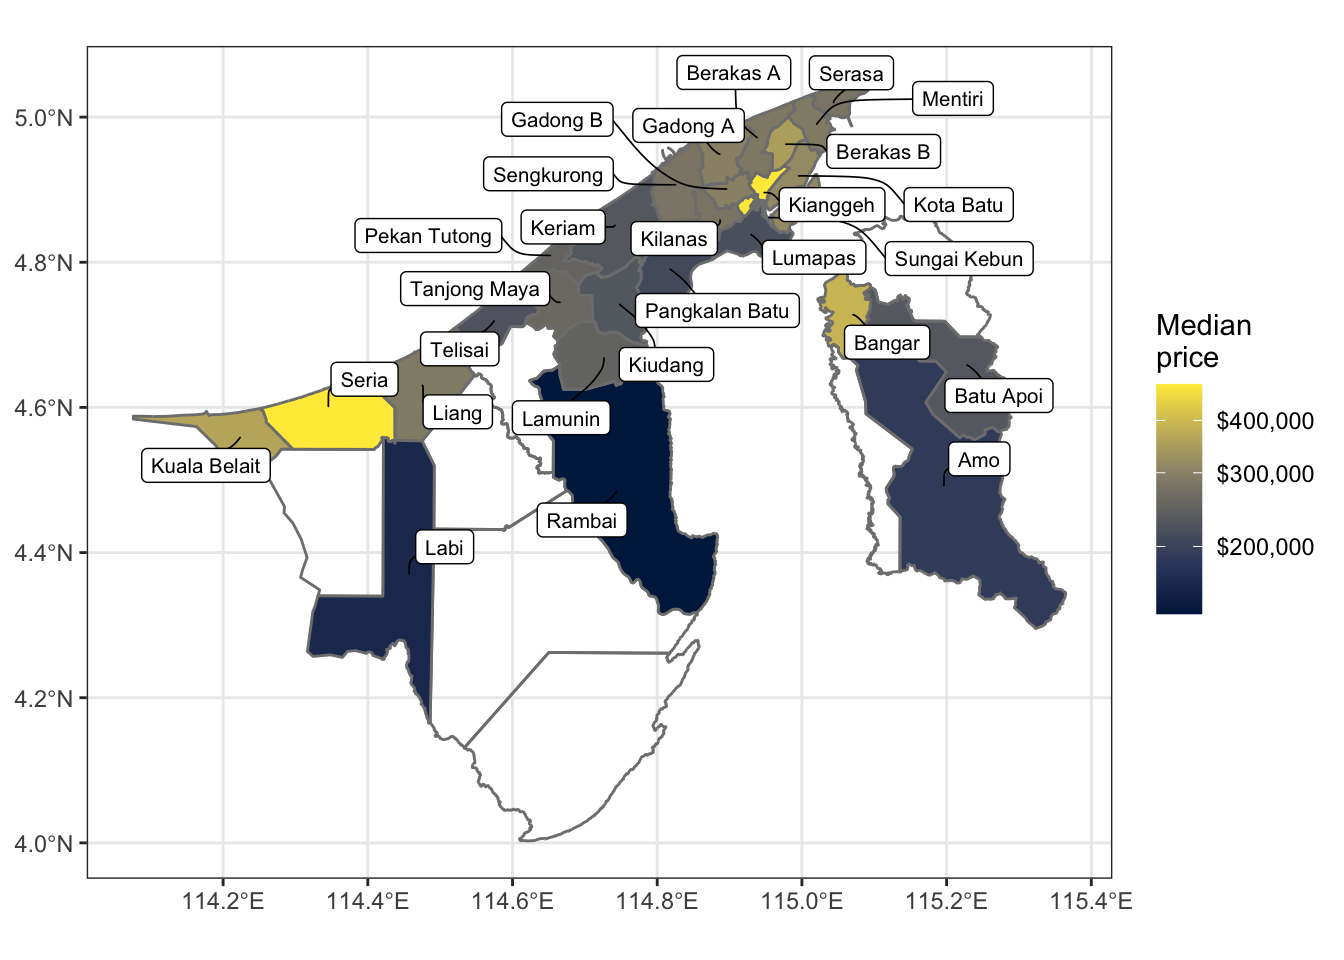
<figcaption>Figure 1: Spatial distribution of median property prices by mukim.</figcaption>
</figure>

## 3.3 Listing Dates

The `date` variable represents the date on which the property listing was obtained, rather than the date of sale or transaction, and should be interpreted as a snapshot of market conditions at a specific point in time. <a href="#fig-price-evolution" class="quarto-xref">Figure 2</a> illustrates the price evolution over time. For analysis, we recommend aggregating data by quarters, as represented by the `quarter` variable. This aggregation helps address potential issues like missing data (see subsection below) and provides a more stable and robust representation of market trends, making it suitable for temporal analysis of the housing market.

``` python
slider::slide_period_dfr(hsp_all, hsp_all$date, "month", \(df) {
  df |>
    filter(type != "Land") |>
    summarise(
      date = min(date), 
      price = median(price, na.rm = TRUE),
      plot_area = median(plot_area, na.rm = TRUE),
      floor_area = median(floor_area, na.rm = TRUE),
      .by = type
    )
}, .before = 18, .after = 6) |>
  distinct(date, type, .keep_all = TRUE) |> 
  mutate(
    price_per_sqft = price / floor_area,
    type = factor(type, levels = c("Detached", "Semi-Detached", "Terrace",
                                   "Apartment", "Overall")) 
  ) |>
  ggplot(aes(x = date, y = price_per_sqft, col = type)) +
  geom_line(aes(linewidth = type)) +
  scale_x_date(
    breaks = scales::breaks_width("1 year"), 
    labels = scales::label_date("%Y"),
    name = NULL
  ) +
  scale_y_continuous(
    labels = scales::dollar,
    name = "Price per square foot (BND)"
  ) +
  scale_colour_manual(values = c(RColorBrewer::brewer.pal(4, "Set1"), "black")) +
  scale_linewidth_manual(values = c(rep(0.6, 4), 1.2)) +
  labs(
    col = NULL,
    linewidth = NULL
    # caption = "Median smoothed prices using a 12-month rolling window."
  ) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "top"
  ) 
```

    Warning: Removed 20 rows containing missing values or values outside the scale range
    (`geom_line()`).

<figure id="fig-price-evolution">
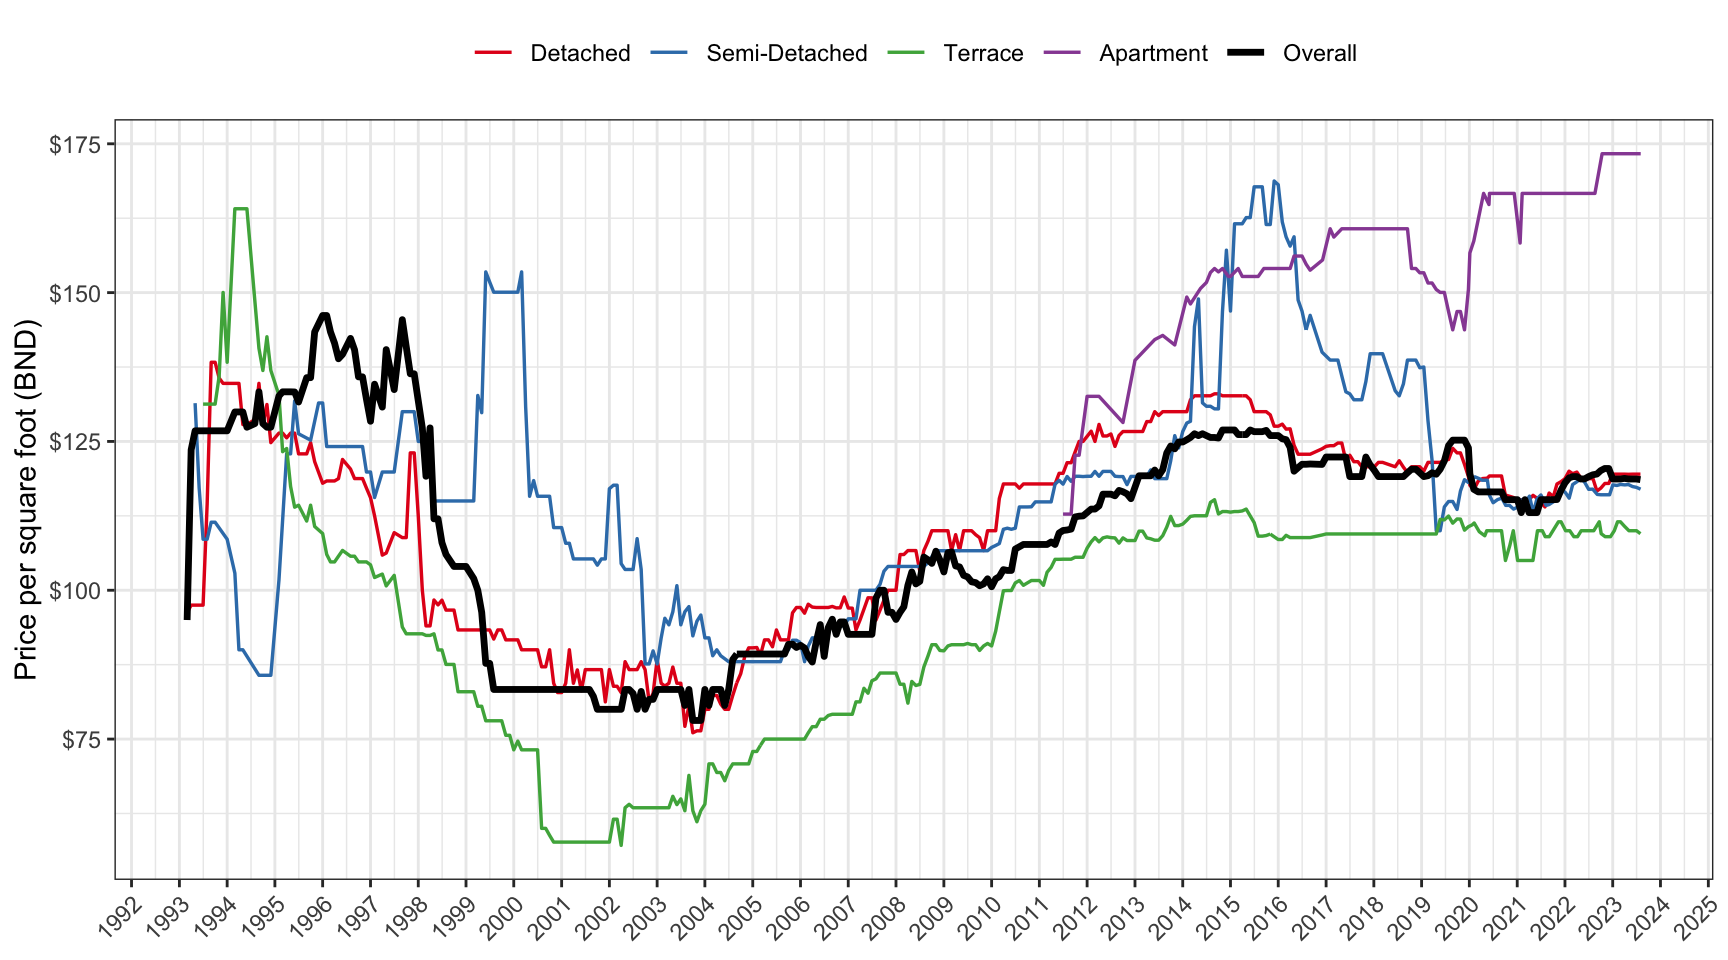
<figcaption>Figure 2: Median smoothed prices per square foot by property type using a 24-month (8-quarter) rolling window.</figcaption>
</figure>

## 3.4 Missing Values

In any data collection effort, it is unsurprising to encounter missing data. Likewise in our data set, missing values occur across several property characteristics–such as plot area, floor area, beds, baths, and others. A preliminary analysis of the missing data patterns indicates that the missingness is not completely random, with certain variables displaying dependencies on others. Advertisers often include only the information they deem most marketable or necessary, while other details may be omitted if they are considered standard or implied. For instance, a listing might specify the square footage and price but leave out the number of bedrooms and bathrooms, assuming that prospective buyers are able to infer these details.

``` python
hsp |>
  dplyr::select(price, plot_area, floor_area, beds, baths) |>
  plot_pattern(npat = 16) +
  coord_flip() +
  theme(aspect.ratio = 0.3)
```

    Warning: Number of patterns specified is equal to or greater than the total number of
    patterns.
    ℹ All missing data patterns are shown.Coordinate system already present. Adding new coordinate system, which will
    replace the existing one.

<figure id="fig-missing-pattern">
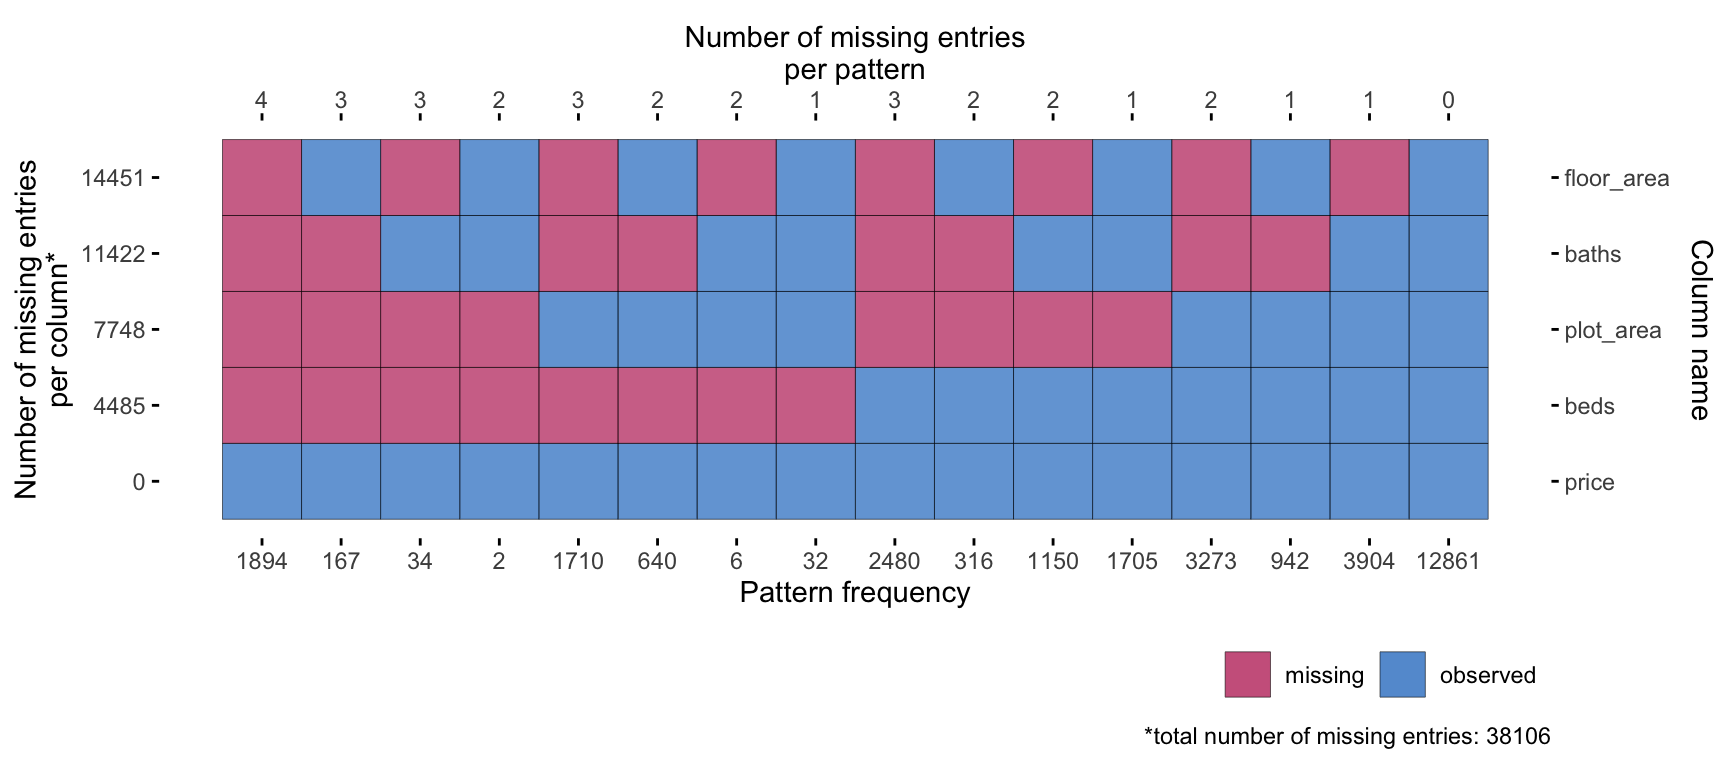
<figcaption>Figure 3: Missing data patterns for key house characteristics.</figcaption>
</figure>

Missing values are represented by blank cells in the CSV file. The severity of missingness is summarised in <a href="#tbl-avail" class="quarto-xref">Table 3</a> and patterns visualised in <a href="#fig-missing-pattern" class="quarto-xref">Figure 3</a>. In total, 10.1% of the records contain missing values for all key house characteristics (i.e. plot area, floor area, beds, and baths), which, depending on the research question, may require imputation or the exclusion of these records.

# 4. Experimental Design, Materials and Methods

In this section we describe the data collection process, which involved either a manual transcription of property listings from newspapers, or web scraping of online property agent listings. The data collection method varied over the years due to the availability of data sources and the evolution of technology. For the later years, a large language model (LLM) was also employed to perform data cleaning on the web scraped data. <a href="#tbl-avail" class="quarto-xref">Table 3</a> details which method was used for each year in the data set, and whether the data was subjected to LLM post-processing.

All analyses were conducted using the R programming language \[[7](#ref-rcoreteam2024language)\], with specific packages used described in each subsection below.

``` python
hsp |>
  mutate(
    year = year(date),
    missing_price = is.na(price),
    missing_type = is.na(type),
    missing_tenure = is.na(tenure),
    missing_status = is.na(status),
    missing_plot_area = is.na(plot_area),
    missing_floor_area = is.na(floor_area),
    missing_storeys = is.na(storeys),
    missing_beds = is.na(beds),
    missing_baths = is.na(baths),
    missing_housechar = missing_plot_area & missing_floor_area & missing_beds & missing_baths,
    year = year(quarter),
  ) |>
  summarise(
    count = n(),
    spatial = length(unique(mukim)) / length(unique(hsp$mukim)),
    # price = sum(missing_price),
    type = sum(missing_type),
    house_char = sum(missing_housechar),
    source = list(unique(method)),
    .by = year
  ) |>
  mutate(
    `nat-archive` = map_chr(source, ~ ifelse("nat-archive" %in% .x, "✔", "")),
    `online-archive` = map_chr(source, ~ ifelse("online-archive" %in% .x, "✔", "")),
    `web-scrape` = map_chr(source, ~ ifelse("web-scrape" %in% .x | "web-scrape-llm" %in% .x, "✔", "")),
    llm = map_chr(source, ~ ifelse("web-scrape-llm" %in% .x, "✔", ""))
  ) |> 
  select(-source) |>
  mutate(across(type:house_char, \(x) x / count)) |>
  gt(rowname_col = "year") |>
  cols_align(
    align = "center",
    columns = `nat-archive`:llm
  ) |>
  tab_spanner(
    label = "Data source",
    columns = `nat-archive`:`web-scrape`
  ) |>
  tab_spanner(
    label = "Missing data severity",
    columns = type:house_char
  ) |>
  fmt_percent(
    spatial:house_char,
    decimals = 1
  ) |>
  cols_label(
    year ~ "Year",
    count ~ "Count",
    spatial ~ "Spatial coverage (mukim)",
    type ~ "Property Type",
    house_char ~ "Property Characteristics",
    `nat-archive` ~ "National Archive",
    `online-archive` ~ "Online Archive",
    `web-scrape` ~ "Web Scraping",
    llm ~ "LLM post-processing"
  ) |>
  grand_summary_rows(
    columns = count:house_char,
    fns = list(Mean = "mean"),
    fmt = list(
      ~ fmt_number(., decimals = 0, columns = "count"),
      ~ fmt_percent(., decimals = 1, columns = c("spatial", "type", "house_char"))
    )
  ) |>
  tab_footnote(
    footnote = paste0("Of Brunei’s 39 mukims, only 27 are considered transactable--excluding water villages and remote, non-developable areas."),
    locations = cells_column_labels(columns = spatial)
  ) |>
  tab_footnote(
    footnote = "Unknown property type.",
    locations = cells_column_labels(columns = type)
  ) |>
  tab_footnote(
    footnote = "Missing all of plot area, floor area, beds, and baths variables.",
    locations = cells_column_labels(columns = house_char)
  ) |>
  tab_options(
    quarto.disable_processing = TRUE,
    grand_summary_row.text_transform = "capitalize"
  ) 
```

<div id="mnxpxddwfw" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#mnxpxddwfw table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#mnxpxddwfw thead, #mnxpxddwfw tbody, #mnxpxddwfw tfoot, #mnxpxddwfw tr, #mnxpxddwfw td, #mnxpxddwfw th {
  border-style: none;
}

#mnxpxddwfw p {
  margin: 0;
  padding: 0;
}

#mnxpxddwfw .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#mnxpxddwfw .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#mnxpxddwfw .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#mnxpxddwfw .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#mnxpxddwfw .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#mnxpxddwfw .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#mnxpxddwfw .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#mnxpxddwfw .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#mnxpxddwfw .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#mnxpxddwfw .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#mnxpxddwfw .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#mnxpxddwfw .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#mnxpxddwfw .gt_spanner_row {
  border-bottom-style: hidden;
}

#mnxpxddwfw .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#mnxpxddwfw .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#mnxpxddwfw .gt_from_md > :first-child {
  margin-top: 0;
}

#mnxpxddwfw .gt_from_md > :last-child {
  margin-bottom: 0;
}

#mnxpxddwfw .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#mnxpxddwfw .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#mnxpxddwfw .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#mnxpxddwfw .gt_row_group_first td {
  border-top-width: 2px;
}

#mnxpxddwfw .gt_row_group_first th {
  border-top-width: 2px;
}

#mnxpxddwfw .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#mnxpxddwfw .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#mnxpxddwfw .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#mnxpxddwfw .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#mnxpxddwfw .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: capitalize;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#mnxpxddwfw .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#mnxpxddwfw .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#mnxpxddwfw .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#mnxpxddwfw .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#mnxpxddwfw .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#mnxpxddwfw .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#mnxpxddwfw .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#mnxpxddwfw .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#mnxpxddwfw .gt_left {
  text-align: left;
}

#mnxpxddwfw .gt_center {
  text-align: center;
}

#mnxpxddwfw .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#mnxpxddwfw .gt_font_normal {
  font-weight: normal;
}

#mnxpxddwfw .gt_font_bold {
  font-weight: bold;
}

#mnxpxddwfw .gt_font_italic {
  font-style: italic;
}

#mnxpxddwfw .gt_super {
  font-size: 65%;
}

#mnxpxddwfw .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#mnxpxddwfw .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#mnxpxddwfw .gt_indent_1 {
  text-indent: 5px;
}

#mnxpxddwfw .gt_indent_2 {
  text-indent: 10px;
}

#mnxpxddwfw .gt_indent_3 {
  text-indent: 15px;
}

#mnxpxddwfw .gt_indent_4 {
  text-indent: 20px;
}

#mnxpxddwfw .gt_indent_5 {
  text-indent: 25px;
}

#mnxpxddwfw .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#mnxpxddwfw div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>
<table class="gt_table" data-quarto-disable-processing="true" data-quarto-bootstrap="false">
  <thead>
    <tr class="gt_col_headings gt_spanner_row">
      <th class="gt_col_heading gt_columns_bottom_border gt_left" rowspan="2" colspan="1" scope="col" id="a::stub"></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="2" colspan="1" scope="col" id="count">Count</th>
      <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="2" colspan="1" scope="col" id="spatial">Spatial coverage (mukim)<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height:0;"><sup>1</sup></span></th>
      <th class="gt_center gt_columns_top_border gt_column_spanner_outer" rowspan="1" colspan="2" scope="colgroup" id="Missing data severity">
        <div class="gt_column_spanner">Missing data severity</div>
      </th>
      <th class="gt_center gt_columns_top_border gt_column_spanner_outer" rowspan="1" colspan="3" scope="colgroup" id="Data source">
        <div class="gt_column_spanner">Data source</div>
      </th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="2" colspan="1" scope="col" id="llm">LLM post-processing</th>
    </tr>
    <tr class="gt_col_headings">
      <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="type">Property Type<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height:0;"><sup>2</sup></span></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_right" rowspan="1" colspan="1" scope="col" id="house_char">Property Characteristics<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height:0;"><sup>3</sup></span></th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="nat-archive">National Archive</th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="online-archive">Online Archive</th>
      <th class="gt_col_heading gt_columns_bottom_border gt_center" rowspan="1" colspan="1" scope="col" id="web-scrape">Web Scraping</th>
    </tr>
  </thead>
  <tbody class="gt_table_body">
    <tr><th id="stub_1_1" scope="row" class="gt_row gt_right gt_stub">1993</th>
<td headers="stub_1_1 count" class="gt_row gt_right">400</td>
<td headers="stub_1_1 spatial" class="gt_row gt_right">33.3%</td>
<td headers="stub_1_1 type" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_1 house_char" class="gt_row gt_right">19.0%</td>
<td headers="stub_1_1 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_1 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_1 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_1 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_2" scope="row" class="gt_row gt_right gt_stub">1994</th>
<td headers="stub_1_2 count" class="gt_row gt_right">653</td>
<td headers="stub_1_2 spatial" class="gt_row gt_right">51.9%</td>
<td headers="stub_1_2 type" class="gt_row gt_right">65.8%</td>
<td headers="stub_1_2 house_char" class="gt_row gt_right">27.9%</td>
<td headers="stub_1_2 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_2 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_2 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_2 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_3" scope="row" class="gt_row gt_right gt_stub">1995</th>
<td headers="stub_1_3 count" class="gt_row gt_right">668</td>
<td headers="stub_1_3 spatial" class="gt_row gt_right">70.4%</td>
<td headers="stub_1_3 type" class="gt_row gt_right">66.8%</td>
<td headers="stub_1_3 house_char" class="gt_row gt_right">21.3%</td>
<td headers="stub_1_3 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_3 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_3 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_3 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_4" scope="row" class="gt_row gt_right gt_stub">1996</th>
<td headers="stub_1_4 count" class="gt_row gt_right">561</td>
<td headers="stub_1_4 spatial" class="gt_row gt_right">51.9%</td>
<td headers="stub_1_4 type" class="gt_row gt_right">69.7%</td>
<td headers="stub_1_4 house_char" class="gt_row gt_right">12.1%</td>
<td headers="stub_1_4 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_4 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_4 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_4 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_5" scope="row" class="gt_row gt_right gt_stub">1997</th>
<td headers="stub_1_5 count" class="gt_row gt_right">385</td>
<td headers="stub_1_5 spatial" class="gt_row gt_right">51.9%</td>
<td headers="stub_1_5 type" class="gt_row gt_right">38.4%</td>
<td headers="stub_1_5 house_char" class="gt_row gt_right">26.8%</td>
<td headers="stub_1_5 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_5 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_5 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_5 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_6" scope="row" class="gt_row gt_right gt_stub">1998</th>
<td headers="stub_1_6 count" class="gt_row gt_right">345</td>
<td headers="stub_1_6 spatial" class="gt_row gt_right">48.1%</td>
<td headers="stub_1_6 type" class="gt_row gt_right">36.8%</td>
<td headers="stub_1_6 house_char" class="gt_row gt_right">28.7%</td>
<td headers="stub_1_6 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_6 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_6 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_6 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_7" scope="row" class="gt_row gt_right gt_stub">1999</th>
<td headers="stub_1_7 count" class="gt_row gt_right">317</td>
<td headers="stub_1_7 spatial" class="gt_row gt_right">51.9%</td>
<td headers="stub_1_7 type" class="gt_row gt_right">31.9%</td>
<td headers="stub_1_7 house_char" class="gt_row gt_right">26.2%</td>
<td headers="stub_1_7 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_7 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_7 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_7 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_8" scope="row" class="gt_row gt_right gt_stub">2000</th>
<td headers="stub_1_8 count" class="gt_row gt_right">378</td>
<td headers="stub_1_8 spatial" class="gt_row gt_right">63.0%</td>
<td headers="stub_1_8 type" class="gt_row gt_right">0.8%</td>
<td headers="stub_1_8 house_char" class="gt_row gt_right">4.2%</td>
<td headers="stub_1_8 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_8 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_8 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_8 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_9" scope="row" class="gt_row gt_right gt_stub">2001</th>
<td headers="stub_1_9 count" class="gt_row gt_right">342</td>
<td headers="stub_1_9 spatial" class="gt_row gt_right">63.0%</td>
<td headers="stub_1_9 type" class="gt_row gt_right">0.3%</td>
<td headers="stub_1_9 house_char" class="gt_row gt_right">2.3%</td>
<td headers="stub_1_9 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_9 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_9 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_9 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_10" scope="row" class="gt_row gt_right gt_stub">2002</th>
<td headers="stub_1_10 count" class="gt_row gt_right">437</td>
<td headers="stub_1_10 spatial" class="gt_row gt_right">63.0%</td>
<td headers="stub_1_10 type" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_10 house_char" class="gt_row gt_right">20.4%</td>
<td headers="stub_1_10 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_10 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_10 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_10 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_11" scope="row" class="gt_row gt_right gt_stub">2003</th>
<td headers="stub_1_11 count" class="gt_row gt_right">449</td>
<td headers="stub_1_11 spatial" class="gt_row gt_right">66.7%</td>
<td headers="stub_1_11 type" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_11 house_char" class="gt_row gt_right">13.4%</td>
<td headers="stub_1_11 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_11 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_11 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_11 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_12" scope="row" class="gt_row gt_right gt_stub">2004</th>
<td headers="stub_1_12 count" class="gt_row gt_right">440</td>
<td headers="stub_1_12 spatial" class="gt_row gt_right">63.0%</td>
<td headers="stub_1_12 type" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_12 house_char" class="gt_row gt_right">19.1%</td>
<td headers="stub_1_12 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_12 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_12 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_12 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_13" scope="row" class="gt_row gt_right gt_stub">2005</th>
<td headers="stub_1_13 count" class="gt_row gt_right">493</td>
<td headers="stub_1_13 spatial" class="gt_row gt_right">66.7%</td>
<td headers="stub_1_13 type" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_13 house_char" class="gt_row gt_right">13.2%</td>
<td headers="stub_1_13 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_13 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_13 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_13 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_14" scope="row" class="gt_row gt_right gt_stub">2006</th>
<td headers="stub_1_14 count" class="gt_row gt_right">653</td>
<td headers="stub_1_14 spatial" class="gt_row gt_right">59.3%</td>
<td headers="stub_1_14 type" class="gt_row gt_right">0.2%</td>
<td headers="stub_1_14 house_char" class="gt_row gt_right">11.3%</td>
<td headers="stub_1_14 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_14 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_14 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_14 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_15" scope="row" class="gt_row gt_right gt_stub">2007</th>
<td headers="stub_1_15 count" class="gt_row gt_right">638</td>
<td headers="stub_1_15 spatial" class="gt_row gt_right">55.6%</td>
<td headers="stub_1_15 type" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_15 house_char" class="gt_row gt_right">12.9%</td>
<td headers="stub_1_15 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_15 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_15 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_15 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_16" scope="row" class="gt_row gt_right gt_stub">2008</th>
<td headers="stub_1_16 count" class="gt_row gt_right">687</td>
<td headers="stub_1_16 spatial" class="gt_row gt_right">59.3%</td>
<td headers="stub_1_16 type" class="gt_row gt_right">0.3%</td>
<td headers="stub_1_16 house_char" class="gt_row gt_right">5.8%</td>
<td headers="stub_1_16 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_16 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_16 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_16 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_17" scope="row" class="gt_row gt_right gt_stub">2009</th>
<td headers="stub_1_17 count" class="gt_row gt_right">531</td>
<td headers="stub_1_17 spatial" class="gt_row gt_right">51.9%</td>
<td headers="stub_1_17 type" class="gt_row gt_right">0.2%</td>
<td headers="stub_1_17 house_char" class="gt_row gt_right">4.0%</td>
<td headers="stub_1_17 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_17 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_17 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_17 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_18" scope="row" class="gt_row gt_right gt_stub">2010</th>
<td headers="stub_1_18 count" class="gt_row gt_right">571</td>
<td headers="stub_1_18 spatial" class="gt_row gt_right">55.6%</td>
<td headers="stub_1_18 type" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_18 house_char" class="gt_row gt_right">2.1%</td>
<td headers="stub_1_18 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_18 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_18 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_18 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_19" scope="row" class="gt_row gt_right gt_stub">2011</th>
<td headers="stub_1_19 count" class="gt_row gt_right">594</td>
<td headers="stub_1_19 spatial" class="gt_row gt_right">55.6%</td>
<td headers="stub_1_19 type" class="gt_row gt_right">0.2%</td>
<td headers="stub_1_19 house_char" class="gt_row gt_right">10.1%</td>
<td headers="stub_1_19 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_19 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_19 web-scrape" class="gt_row gt_center"></td>
<td headers="stub_1_19 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_20" scope="row" class="gt_row gt_right gt_stub">2012</th>
<td headers="stub_1_20 count" class="gt_row gt_right">934</td>
<td headers="stub_1_20 spatial" class="gt_row gt_right">63.0%</td>
<td headers="stub_1_20 type" class="gt_row gt_right">8.0%</td>
<td headers="stub_1_20 house_char" class="gt_row gt_right">4.3%</td>
<td headers="stub_1_20 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_20 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_20 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_20 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_21" scope="row" class="gt_row gt_right gt_stub">2013</th>
<td headers="stub_1_21 count" class="gt_row gt_right">882</td>
<td headers="stub_1_21 spatial" class="gt_row gt_right">59.3%</td>
<td headers="stub_1_21 type" class="gt_row gt_right">2.9%</td>
<td headers="stub_1_21 house_char" class="gt_row gt_right">26.4%</td>
<td headers="stub_1_21 nat-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_21 online-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_21 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_21 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_22" scope="row" class="gt_row gt_right gt_stub">2014</th>
<td headers="stub_1_22 count" class="gt_row gt_right">709</td>
<td headers="stub_1_22 spatial" class="gt_row gt_right">66.7%</td>
<td headers="stub_1_22 type" class="gt_row gt_right">10.6%</td>
<td headers="stub_1_22 house_char" class="gt_row gt_right">8.0%</td>
<td headers="stub_1_22 nat-archive" class="gt_row gt_center"></td>
<td headers="stub_1_22 online-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_22 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_22 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_23" scope="row" class="gt_row gt_right gt_stub">2015</th>
<td headers="stub_1_23 count" class="gt_row gt_right">868</td>
<td headers="stub_1_23 spatial" class="gt_row gt_right">66.7%</td>
<td headers="stub_1_23 type" class="gt_row gt_right">12.6%</td>
<td headers="stub_1_23 house_char" class="gt_row gt_right">6.3%</td>
<td headers="stub_1_23 nat-archive" class="gt_row gt_center"></td>
<td headers="stub_1_23 online-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_23 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_23 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_24" scope="row" class="gt_row gt_right gt_stub">2016</th>
<td headers="stub_1_24 count" class="gt_row gt_right">1461</td>
<td headers="stub_1_24 spatial" class="gt_row gt_right">70.4%</td>
<td headers="stub_1_24 type" class="gt_row gt_right">13.6%</td>
<td headers="stub_1_24 house_char" class="gt_row gt_right">4.6%</td>
<td headers="stub_1_24 nat-archive" class="gt_row gt_center"></td>
<td headers="stub_1_24 online-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_24 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_24 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_25" scope="row" class="gt_row gt_right gt_stub">2017</th>
<td headers="stub_1_25 count" class="gt_row gt_right">1638</td>
<td headers="stub_1_25 spatial" class="gt_row gt_right">70.4%</td>
<td headers="stub_1_25 type" class="gt_row gt_right">14.5%</td>
<td headers="stub_1_25 house_char" class="gt_row gt_right">4.5%</td>
<td headers="stub_1_25 nat-archive" class="gt_row gt_center"></td>
<td headers="stub_1_25 online-archive" class="gt_row gt_center">✔</td>
<td headers="stub_1_25 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_25 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_26" scope="row" class="gt_row gt_right gt_stub">2018</th>
<td headers="stub_1_26 count" class="gt_row gt_right">2646</td>
<td headers="stub_1_26 spatial" class="gt_row gt_right">66.7%</td>
<td headers="stub_1_26 type" class="gt_row gt_right">17.6%</td>
<td headers="stub_1_26 house_char" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_26 nat-archive" class="gt_row gt_center"></td>
<td headers="stub_1_26 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_26 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_26 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_27" scope="row" class="gt_row gt_right gt_stub">2019</th>
<td headers="stub_1_27 count" class="gt_row gt_right">3586</td>
<td headers="stub_1_27 spatial" class="gt_row gt_right">63.0%</td>
<td headers="stub_1_27 type" class="gt_row gt_right">15.9%</td>
<td headers="stub_1_27 house_char" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_27 nat-archive" class="gt_row gt_center"></td>
<td headers="stub_1_27 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_27 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_27 llm" class="gt_row gt_center"></td></tr>
    <tr><th id="stub_1_28" scope="row" class="gt_row gt_right gt_stub">2020</th>
<td headers="stub_1_28 count" class="gt_row gt_right">1363</td>
<td headers="stub_1_28 spatial" class="gt_row gt_right">66.7%</td>
<td headers="stub_1_28 type" class="gt_row gt_right">10.4%</td>
<td headers="stub_1_28 house_char" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_28 nat-archive" class="gt_row gt_center"></td>
<td headers="stub_1_28 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_28 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_28 llm" class="gt_row gt_center">✔</td></tr>
    <tr><th id="stub_1_29" scope="row" class="gt_row gt_right gt_stub">2021</th>
<td headers="stub_1_29 count" class="gt_row gt_right">1115</td>
<td headers="stub_1_29 spatial" class="gt_row gt_right">77.8%</td>
<td headers="stub_1_29 type" class="gt_row gt_right">2.0%</td>
<td headers="stub_1_29 house_char" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_29 nat-archive" class="gt_row gt_center"></td>
<td headers="stub_1_29 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_29 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_29 llm" class="gt_row gt_center">✔</td></tr>
    <tr><th id="stub_1_30" scope="row" class="gt_row gt_right gt_stub">2022</th>
<td headers="stub_1_30 count" class="gt_row gt_right">1235</td>
<td headers="stub_1_30 spatial" class="gt_row gt_right">77.8%</td>
<td headers="stub_1_30 type" class="gt_row gt_right">3.6%</td>
<td headers="stub_1_30 house_char" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_30 nat-archive" class="gt_row gt_center"></td>
<td headers="stub_1_30 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_30 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_30 llm" class="gt_row gt_center">✔</td></tr>
    <tr><th id="stub_1_31" scope="row" class="gt_row gt_right gt_stub">2023</th>
<td headers="stub_1_31 count" class="gt_row gt_right">1593</td>
<td headers="stub_1_31 spatial" class="gt_row gt_right">77.8%</td>
<td headers="stub_1_31 type" class="gt_row gt_right">2.8%</td>
<td headers="stub_1_31 house_char" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_31 nat-archive" class="gt_row gt_center"></td>
<td headers="stub_1_31 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_31 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_31 llm" class="gt_row gt_center">✔</td></tr>
    <tr><th id="stub_1_32" scope="row" class="gt_row gt_right gt_stub">2024</th>
<td headers="stub_1_32 count" class="gt_row gt_right">2972</td>
<td headers="stub_1_32 spatial" class="gt_row gt_right">77.8%</td>
<td headers="stub_1_32 type" class="gt_row gt_right">4.6%</td>
<td headers="stub_1_32 house_char" class="gt_row gt_right">0.1%</td>
<td headers="stub_1_32 nat-archive" class="gt_row gt_center"></td>
<td headers="stub_1_32 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_32 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_32 llm" class="gt_row gt_center">✔</td></tr>
    <tr><th id="stub_1_33" scope="row" class="gt_row gt_right gt_stub">2025</th>
<td headers="stub_1_33 count" class="gt_row gt_right">572</td>
<td headers="stub_1_33 spatial" class="gt_row gt_right">59.3%</td>
<td headers="stub_1_33 type" class="gt_row gt_right">14.7%</td>
<td headers="stub_1_33 house_char" class="gt_row gt_right">0.0%</td>
<td headers="stub_1_33 nat-archive" class="gt_row gt_center"></td>
<td headers="stub_1_33 online-archive" class="gt_row gt_center"></td>
<td headers="stub_1_33 web-scrape" class="gt_row gt_center">✔</td>
<td headers="stub_1_33 llm" class="gt_row gt_center">✔</td></tr>
    <tr><th id="grand_summary_stub_1" scope="row" class="gt_row gt_left gt_stub gt_grand_summary_row gt_first_grand_summary_row gt_last_summary_row">mean</th>
<td headers="grand_summary_stub_1 count" class="gt_row gt_right gt_grand_summary_row gt_first_grand_summary_row gt_last_summary_row">943</td>
<td headers="grand_summary_stub_1 spatial" class="gt_row gt_right gt_grand_summary_row gt_first_grand_summary_row gt_last_summary_row">62.0%</td>
<td headers="grand_summary_stub_1 type" class="gt_row gt_right gt_grand_summary_row gt_first_grand_summary_row gt_last_summary_row">13.5%</td>
<td headers="grand_summary_stub_1 house_char" class="gt_row gt_right gt_grand_summary_row gt_first_grand_summary_row gt_last_summary_row">10.1%</td>
<td headers="grand_summary_stub_1 nat-archive" class="gt_row gt_center gt_grand_summary_row gt_first_grand_summary_row gt_last_summary_row">—</td>
<td headers="grand_summary_stub_1 online-archive" class="gt_row gt_center gt_grand_summary_row gt_first_grand_summary_row gt_last_summary_row">—</td>
<td headers="grand_summary_stub_1 web-scrape" class="gt_row gt_center gt_grand_summary_row gt_first_grand_summary_row gt_last_summary_row">—</td>
<td headers="grand_summary_stub_1 llm" class="gt_row gt_center gt_grand_summary_row gt_first_grand_summary_row gt_last_summary_row">—</td></tr>
  </tbody>
  
  <tfoot class="gt_footnotes">
    <tr>
      <td class="gt_footnote" colspan="9"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height:0;"><sup>1</sup></span> Of Brunei’s 39 mukims, only 27 are considered transactable--excluding water villages and remote, non-developable areas.</td>
    </tr>
    <tr>
      <td class="gt_footnote" colspan="9"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height:0;"><sup>2</sup></span> Unknown property type.</td>
    </tr>
    <tr>
      <td class="gt_footnote" colspan="9"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height:0;"><sup>3</sup></span> Missing all of plot area, floor area, beds, and baths variables.</td>
    </tr>
  </tfoot>
</table>
</div>

Table 3: Data availability by year.

## 4.1 Manual Data Collection

Early years data collection was conducted manually, involving the transcription of property listing details from advertisements into a digital tabular format. This process was carried out by two of the authors over a period of nine months, from October 2023 to July 2024, working at a manageable pace. A total of 12,092 data points were collected in this manner, which translates to processing approximately 150 entries per week per person. Spreading the task over such an extended period ensured that transcribers were never under time pressure, which could have led to errors due to fatigue.

The primary sources of the property listings were local newspapers and magazines. Physical copies were accessed through the National Archive of Brunei Darussalam, while digital versions, which are digitised replicas of the physical newspapers, were obtained online. These digital formats were not structured in a way that allowed for automated scraping, hence the need for manual transcription.

Although daily newspapers from 1993 onward were available at the National Archive, the classified sections were not always present. From 1993 to 1999, property advertisements were found only in Friday editions, and occasionally on Saturdays. Thus, newspapers from both these days were reviewed weekly to capture the listings data. This yielded roughly between 300 and 700 listings per year.

From the year 2000 onwards, property advertisements were published daily in the classifieds section. However, reviewing every single daily edition was not practical and would increase the likelihood of recording duplicate listings, thus necessitating a sampling strategy. The sampling was done as follows. Three newspaper editions per week were selected, and the classifieds section was reviewed for property listings. When a listing was found, it was recorded after careful filtering to ensure it was unique. This manual filtering process involved cross-checking based on the real estate agent, house characteristics, price, location, and date proximity. To avoid duplication, the same house listing was not recorded more than once within a quarter. This process yielded roughly the same number of listings per year as the earlier years.

## 4.2 Web Scraping

To compile additional property data for the study beyond manual data collection, web scraping was employed using the R programming language, making use of the `{rvest}` package \[[8](#ref-wickham2024rvest)\]. This method enabled the systematic extraction of structured information from various local property listing websites such as panvilla.com (now defunct), bruhome.com, and bruneiproperty.com.bn. Such websites provide extensive details on properties listed as “for sale” in Brunei, aggregating advertisements from real estate agents and property developers.

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="100.0%" data-layout-align="left">
<div>
<figure>
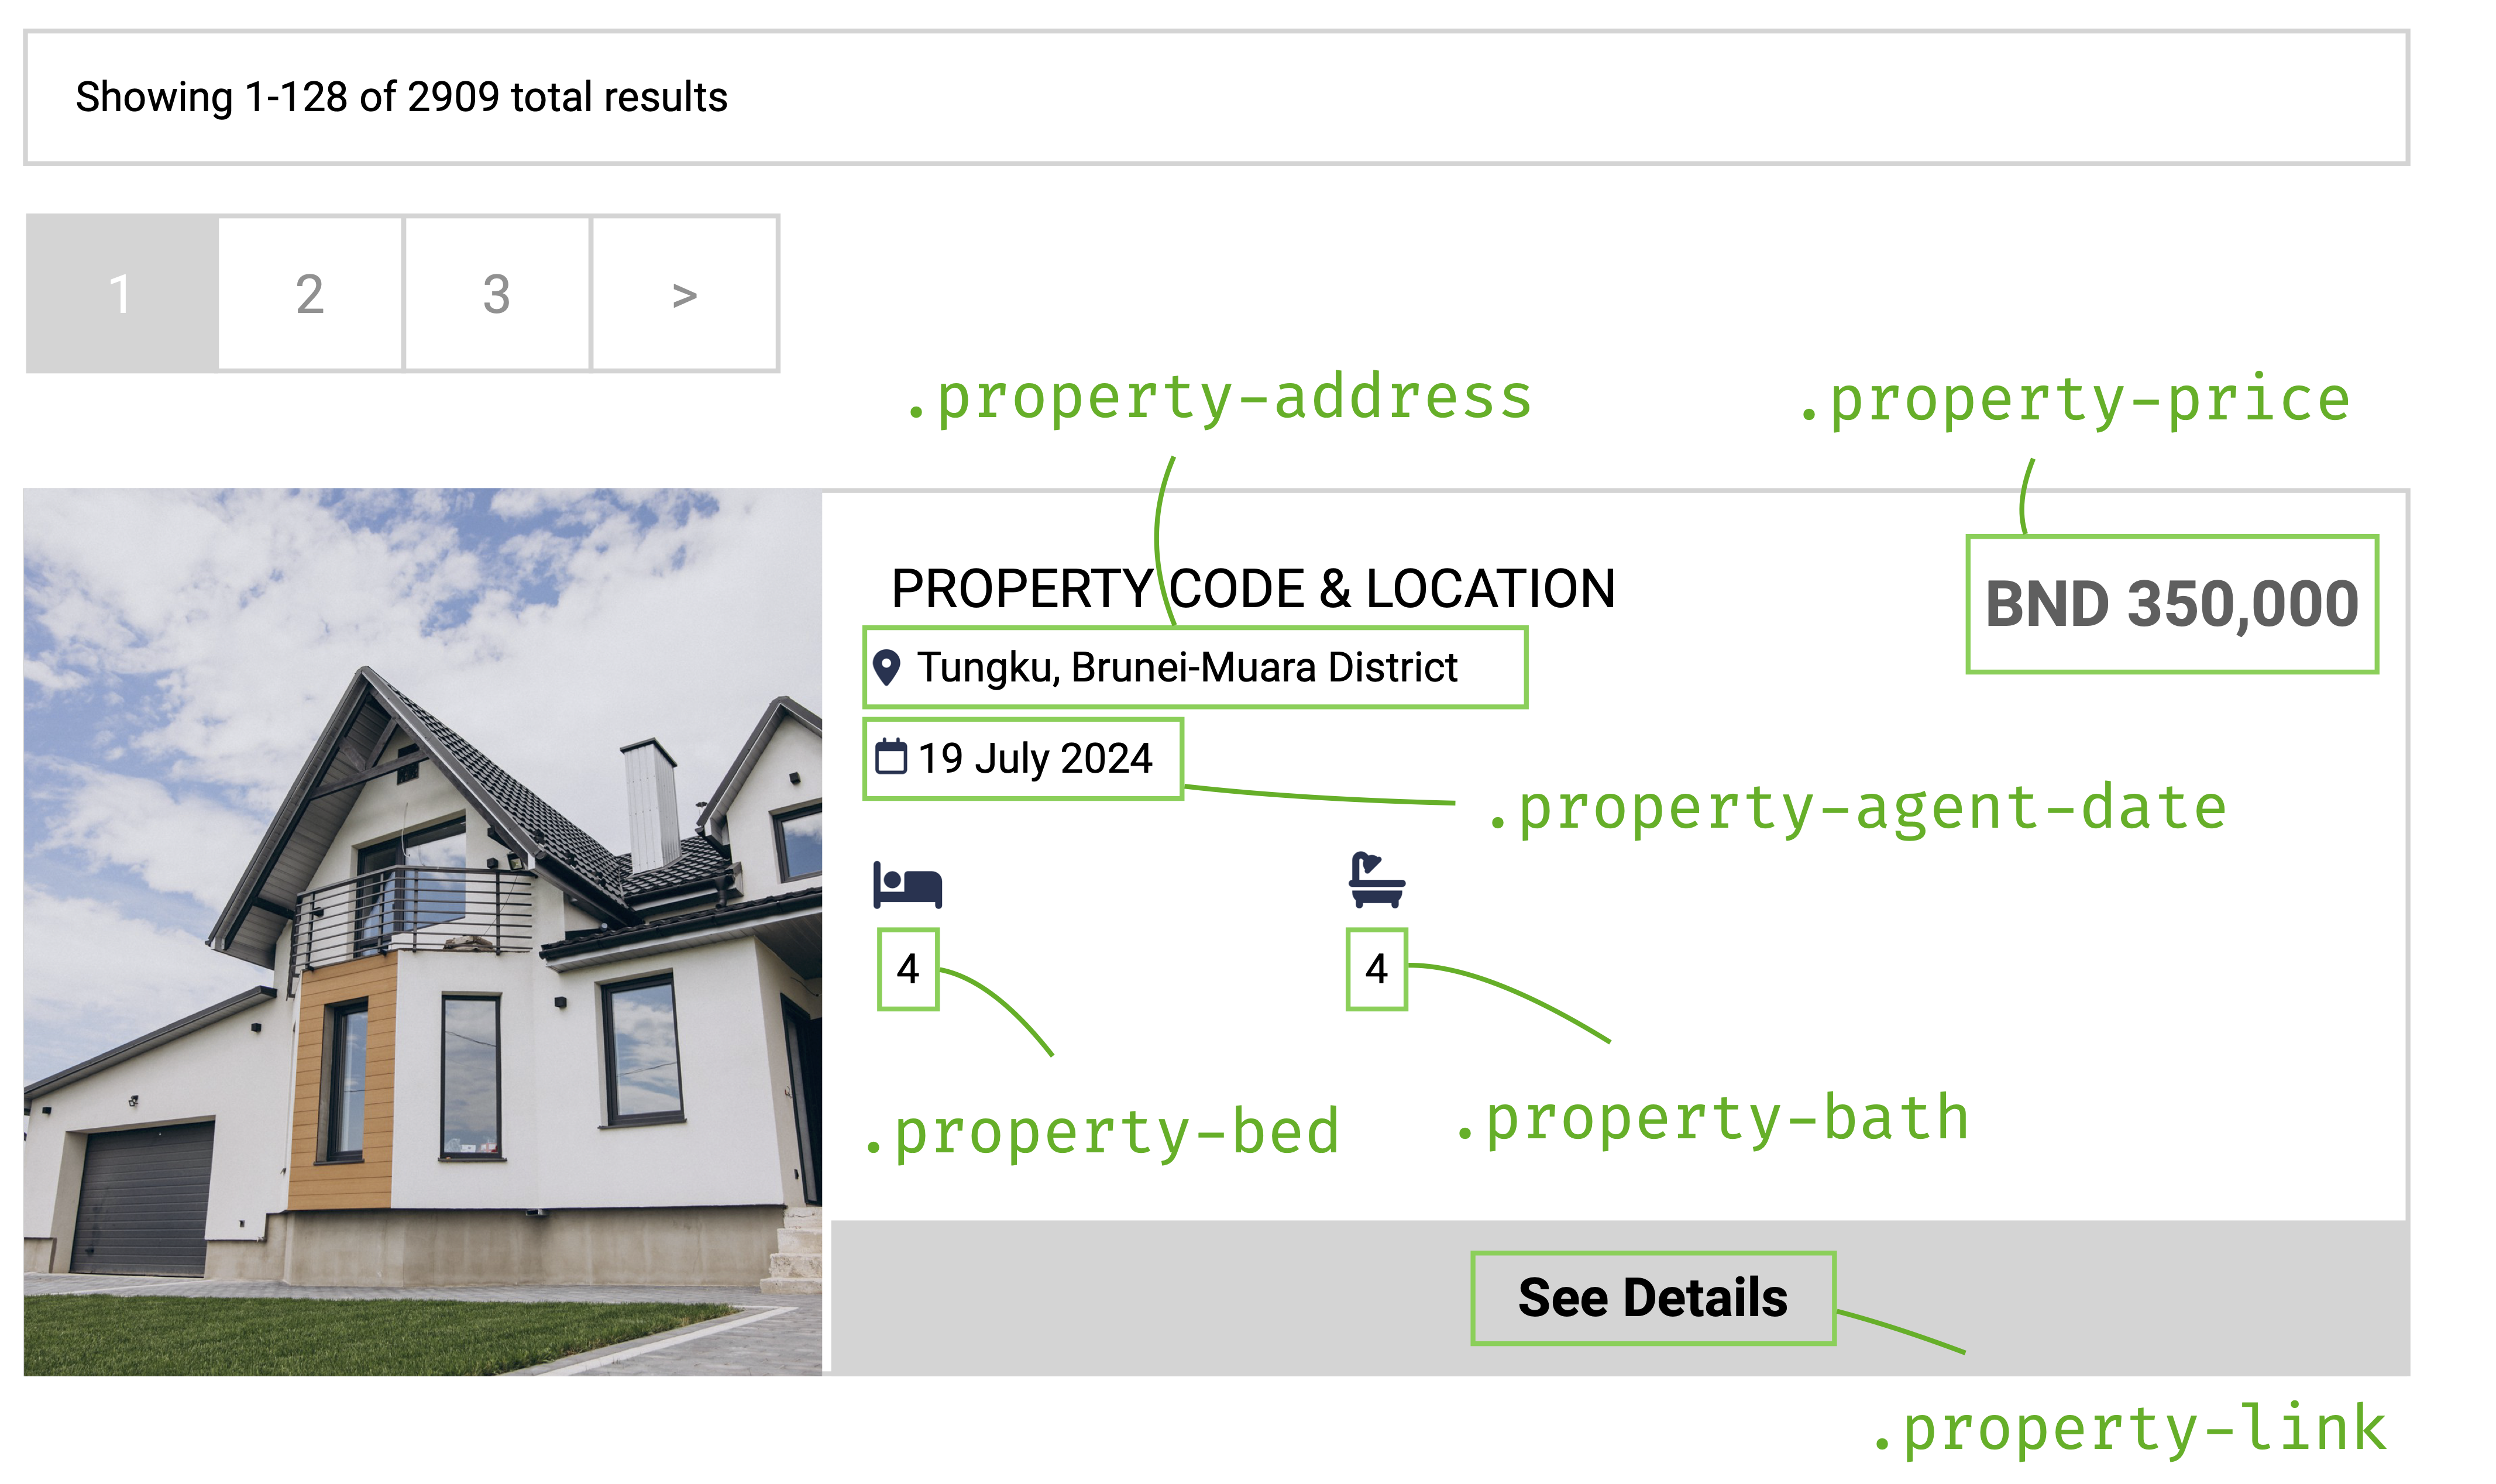
<figcaption aria-hidden="true">A mockup of the structure of property listing showing various HTML elements.</figcaption>
</figure>
<p>(a)</p>
</div>
</div></td>
</tr>
</tbody>
</table>

<table>
<colgroup>
<col style="width: 100%" />
</colgroup>
<tbody>
<tr>
<td style="text-align: left;"><div width="100.0%" data-layout-align="left">
<div>
<figure>
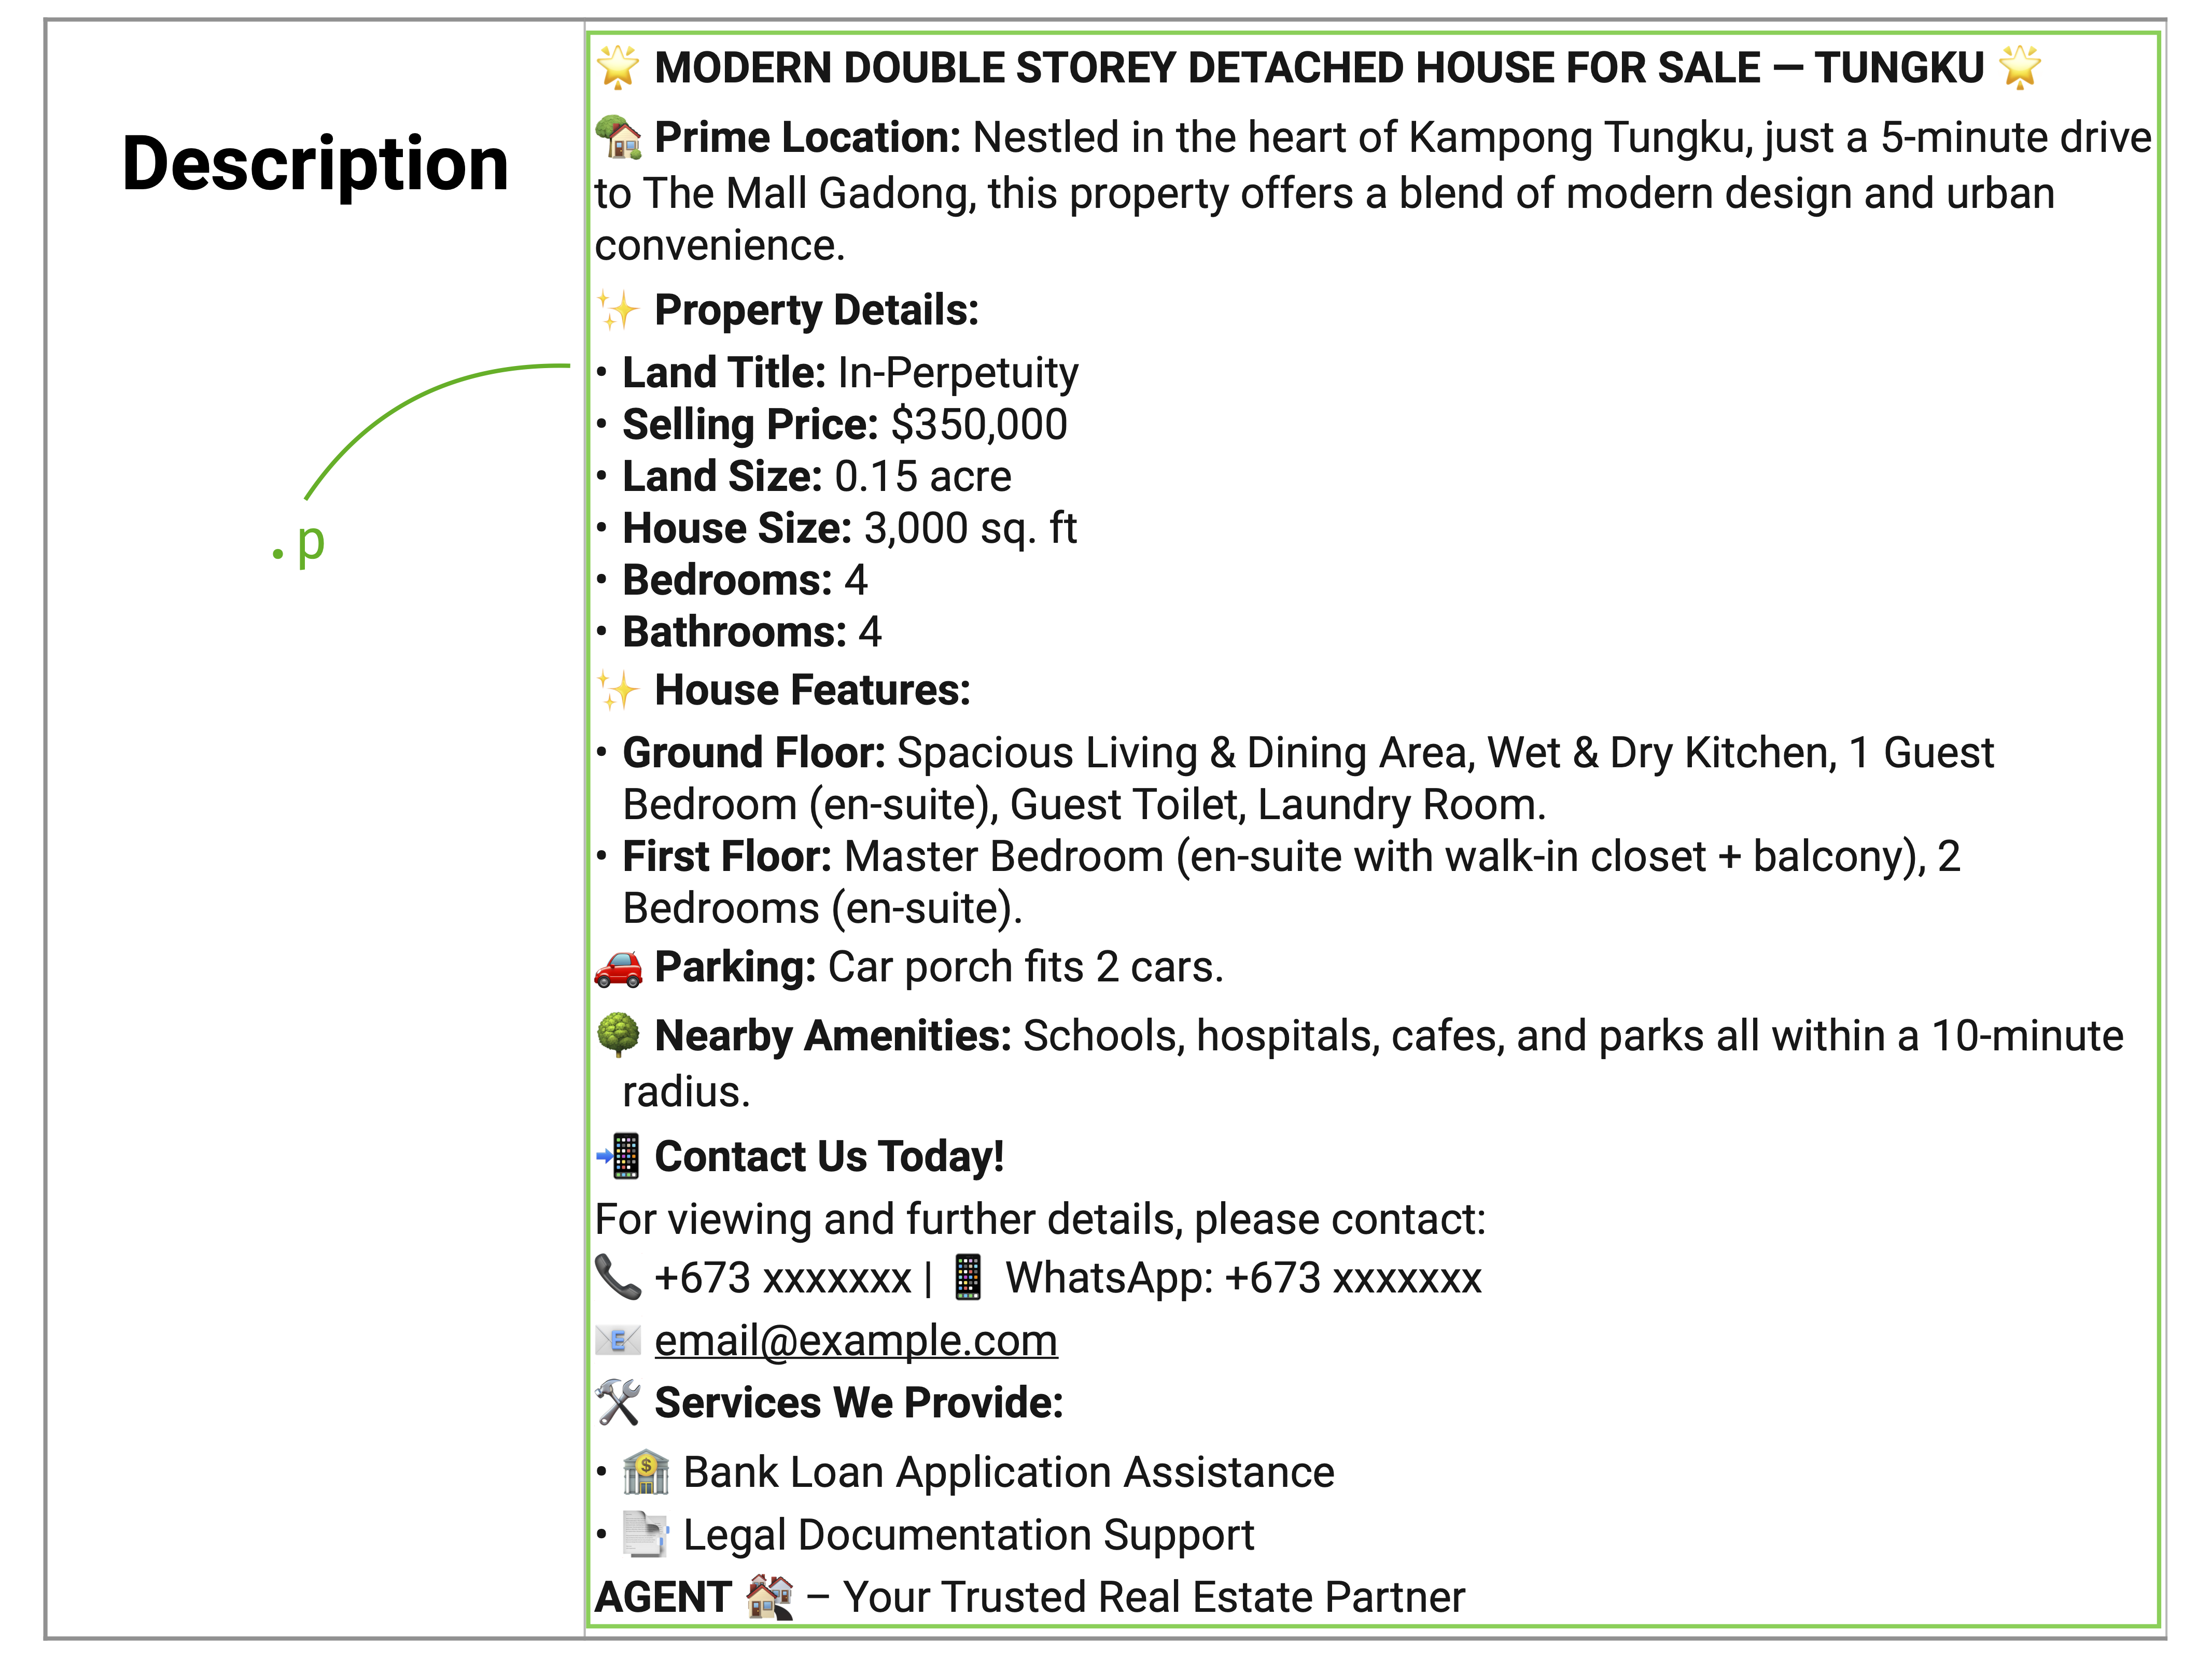
<figcaption aria-hidden="true">Example paragraph containing description within the “See Details” link for each property.</figcaption>
</figure>
<p>(b)</p>
</div>
</div></td>
</tr>
</tbody>
</table>

Figure 4: Illustration of a property listing from a typical Bruneian property portal. Attribution: Freepik.

The process began by identifying the structure of the target websites, focusing on the HTML tags and classes containing the relevant information. The goal here is to programmatically pinpoint and collect specific information like text, links, or attributes. For example, elements such as property prices, number of bedrooms, bathrooms, location, and other features were enclosed within specific HTML elements, which `{rvest}` functions like `html_elements()` and `html_text2()` could target and extract efficiently. <a href="#fig-mockup-listing" class="quarto-xref">Figure 4 (a)</a> illustrates the structure of a typical property listing showing the various HTML elements to target. Example code to perform this task in available in the repository.

Each webpage displayed a fixed number of listings (e.g. 128 per page). To scrape all pages, a loop was created to iterate through each page by modifying the URL (such as with an `&offset=<number>` parameter, where `<number>` represents the cumulative number of listings already scraped).

Extracted data required some cleaning to standardise formats for analysis. Specifically:

-   `price` variables were cleaned by removing non-numeric characters and converted to integers.
-   `beds` and `baths` were converted to integers.
-   `date` variables were formatted properly as `Date` objects.
-   Locations were stored as text strings. See the subsection below on spatial data harmonisation.
-   Any additional information was extracted from the property descriptions and saved as a character vector. This very often contained valuable insights not captured in the primary fields.

Data from 2012 up until the present (February 2025) were managed to be collected using this method, averaging around 1,500 listings per year. While highly efficient, this process relied heavily on the consistency of the site structure of the source webpages. Changes to website layouts or closures over time required significant updates to the scraping scripts. To overcome these issues, alternative approaches, such as using Large Language Models (LLMs), were considered. This is explained in the next subsection.

## 4.3 LLM Data Extraction

As previously mentioned, the web scraping process also captured unstructured information from the property descriptions, which often contained valuable details not captured in the primary fields. In this subsection, we detail the data extraction process using a pre-trained Large Language Model (LLM) to extract structured information from the unstructured text. <!-- The LLM used was the cloud-based OpenAI o1-mini reasoning model[^1], accessed using the `{ellmer}` R package [@wickham2025ellmer] via an API. --> The LLM used was the DeepSeek R1 distilled Qwen 14B \[[9](#ref-deepseek2025deepseekr1),[10](#ref-qwen2025qwen25)\], accessed using the `{ellmer}` R package \[[11](#ref-wickham2025ellmer)\] via the Ollama[1] API, a local interface platform to the LLM.

[1] <https://github.com/ollama/ollama>

The primary goal was to extract the house characteristics of interest, specifically variables 7 to 15 as per <a href="#tbl-codebook" class="quarto-xref">Table 1</a>, from the unstructured verbose descriptions scraped from property listing websites. Each description was processed with a carefully crafted prompt (<a href="#fig-llm-prompt" class="quarto-xref">Figure 5</a>) to ensure consistent output. This prompt instructed the model to return only the required information in a semicolon-separated format, while handling edge cases such as missing descriptions or non-residential (commercial) properties.

``` r
"The following is the description from a property sale listing in Brunei. This 
description will contain the information about the property, including its 
characteristics, price, and location. However, some of these descriptions may 
not contain property listings, and instead contain other or no information at 
all.

In the case where this description is in fact a property listing, I would like 
you to extract the following information:

1. Location / area of the property in Brunei, CHARACTER.
2. Price of the property in Brunei Dollars, NUMERIC.
3. Type of property, CHARACTER -- select from Detached, Semi-Detached, Terrace, 
Apartment, or Land.
4. Land tenure, CHARACTER -- select from Freehold, Leasehold, or Strata. If 
other than this, return 'NA'.
5. Status of the property, CHARACTER -- select from Proposed, Under 
Construction, New, or Resale.
6. Land area in acres, NUMERIC.
7. Built up area in square feet, NUMERIC.
8. Number of storeys, INTEGER.
9. Number of bedrooms, INTEGER.
10. Number of bathrooms, INTEGER.

Further instructions:

- Please return **semicolon** separated values like this:

  Kg Tanah Jambu; 250000; Detached ; Freehold ; New     ; 0.3 ; 2500; 2;  3; 3
  Kg Tungku     ; 300000; Terrace  ; Leasehold; Resale  ; 0.25; 1700; 2;  3; 2 
  Kg Kiarong    ; 200000; Apartment; Strata   ; Proposed; 0.1 ; 1000; NA; 2; 2
  etc.
  NUMBERS SHOULD NOT CONTAIN comma (,) for thousands separator

- If any of the 10 values are missing, please return 'NA' for that value.

- If the description does not contain a property listing (for example, it is a 
rental property advertisement), return 'NA' for all 10 values.

- DO NOT RESPOND WITH ANYTHING ELSE OTHER THAN THE REQUIRED INFORMATION."
```

Figure 5: The LLM prompt to clean descriptions obtained from web scraping.

The verbose descriptions were fed into the model one at a time using a loop, with the LLM extracting and returning the relevant details. Note that this loop was not parallelised, as the LLM already utilises multiple cores, and further parallelisation would not yield significant efficiency gains due to resource constraints. The cleaned results were then parsed and stored in a data frame, which was then subjected to manual data-type validation to ensure conformity with the existing data set (see the last subsection). It takes, on average, 81.7 seconds to process a single description using a Mac Pro 3.2GHz 16 core Intel Xeon W with 48GB of DDR4 RAM. We processed 5,055 descriptions from 2020 to 2025 using this method, with a run time of approximately 20 hours in total spread over three machines.

To evaluate the accuracy of the LLM data extraction, a test data set of 100 artificially generated descriptions was created, with each description written in the style of a typical property listing. For each house characteristic, the accuracy of the LLM was calculated by comparing the extracted value to the ground truth. For numeric variables, values were considered accurate if they fell within 1% of the corresponding ground truth value. For character variables, accuracy was determined using the normalised Levenshtein distance, ensuring differences remained within a set threshold. The test data also contained missing information in certain property characteristics, which the LLM was expected to handle correctly. A correct handling was counted if both the extracted and ground truth values were missing. Accuracy was then averaged per characteristic as well as across all characteristics.

Our experiments show that the LLM data extraction process with the deepseek-r1:14b model achieved an overall accuracy rate of 96.9% (see Appendix for complete results). Errors mostly stemmed from incorrect `status` classification, likely due to the vagueness of the advertisement listing. As for the rest of the variables, clear errors were flagged and corrected manually during our data validation process (described in the subsection following the next one). Overall, the LLM was found to be a valuable tool for extracting structured information from unstructured text, significantly reducing the time and effort required for data extraction. <!-- Users may wish to exclude these records from their analysis if they are concerned about the accuracy of the extracted data. -->

## 4.4 Spatial Data Harmonisation

Whether the data was collected manually, through web scraping, or cleaned using the LLM, the spatial information extracted was often inconsistent in terms of naming conventions and granularity. To address this, a spatial data harmonisation process was conducted to standardise the names of the kampongs (villages) in the data set to the format used by Department of Economic Planning and Statistics (DEPS), Ministry of Finance and Economy, Brunei Darussalam as per the most recent census \[[12](#ref-deps2022population)\]. This is the same format used by the R package `{bruneimap}` \[[6](#ref-jamil2024bruneimap)\]. The CSV file `bn_kpg_level_data.csv` obtained from this package was used as a reference to standardise the kampong names in the data set, which conveniently also includes the mukim and district names for each kampong.

The majority of house listings in Brunei specify the property location using the kampong name, the smallest administrative unit in the country. The task in hand was then to match these kampong names in the data set with the standardised names in the reference file. Several challenges were encountered during this process, including:

1.  Spelling variations and misspellings, though these were relatively straightforward to correct.
2.  Unknown entries, where the correct kampong could sometimes be inferred from the geographical context; otherwise, these were set to `NA`.
3.  Multiple matches, occurring when two or more kampongs shared the same name (e.g., Kampong Panchor in Mukim Mentiri and Kampong Panchor in Mukim Lumapas). Additional information from the listing was used to determine the correct match, but where this was not possible, these entries were also set to `NA`.

This process was carried out manually using data filtering features in Microsoft Excel. Once completed, all entries marked as `NA` were removed so as to provide complete spatial coverage for the data set.

## 4.5 Data Validation

To ensure data quality, a series of consistency and validity checks were performed on the data set, especially after manual transcription and LLM data cleaning. These checks include:

1.  **Outlier detection.** Statistical summaries were analysed to identify and flag anomalous values. For instance, a built-up area recorded as 0.1 square feet or an implausibly high number of beds and baths (e.g., \>20) would likely indicate an error, prompting review. Such anomalies were flagged and manually reviewed for correction.
2.  **Internal consistency checks.** This made use of substantive knowledge about Brunei’s housing market \[[13](#ref-jamil2025spatiotemporal)\]. An example is using the price per square foot indicator, whose value typically falls within a known range. Therefore any deviations were scrutinised to ensure that variables such as price and floor area were correctly recorded. This was similarly applied to other variables such as plot area, beds, and baths.
3.  **Duplicate records detection.** We also performed duplicate record detection to identify any repeated entries that might have arisen from overlapping data sources or transcription errors. Any duplicates that were identified were carefully reviewed and removed to ensure that each property listing was uniquely represented in the span of one calendar month.

These data validation procedures collectively contribute to a robust and reliable data set, providing a solid foundation for subsequent analysis.

# Limitations

Listing prices in our data set serve as a proxy for market values, capturing advertised trends rather than final sale outcomes. While this allows for timely analysis of market sentiment, actual transaction prices may differ due to negotiation dynamics, seller strategies, and broader market conditions.

Despite significant efforts to ensure data quality, some limitations remain. First, integrating historical data from manually transcribed sources with later web-scraped data may introduce inconsistencies, potentially affecting comparability over time. Second, although duplicate listings were carefully reviewed and removed, there remains a slight possibility of residual duplicates within the data set. <!-- Thirdly, the spatial distribution is heavily skewed toward the Brunei-Muara district--reflecting its higher population and transaction volume [@jamil2025spatiotemporal]--which may bias regional analyses. --> Thirdly, while we have confidence in the data quality from 2015 to 2024, property price trends between 1993 and 2014 cannot be fully verified. Nonetheless, this study serves as a valuable starting point. Future research could benefit greatly from access to administrative transaction data, which would allow for more comprehensive and accurate analyses.

Finally, while significant effort was made to harmonise spatial data, matching kampong names to standardised references may not be entirely error-free. However, aggregation to the mukim level provides a reliable alternative for spatial analyses, ensuring that the data set remains valuable for research and analysis.

# Ethics

The authors confirm that the current work does not involve human subjects, animal experiments, or data collected from social media platforms. The data described in this article were obtained from publicly available, non-personal, and factual sources, including physical and digital newspapers and magazines.

Web scraping from local property listings websites was conducted in compliance with ethical and legal considerations. Specifically, data were not collected from behind login barriers, and the terms of service (ToS) for the websites did not explicitly prohibit web scraping. Furthermore, the `robots.txt` files for the websites were reviewed, and any policies outlined there were adhered to.

The data collected consisted exclusively of non-copyrightable factual information, such as property characteristics and spatial locations, and excluded any potentially copyrighted content such as images. To ensure privacy, no personally identifiable information, including specific property addresses, was scraped nor included in the data set. To this end, data from the description fields processed by the LLM are not included in the data set, as they may contain sensitive information such as contact details and company names. The names of real estate agents and companies have been anonymised to ensure privacy.

# CRediT Author Statement

-   **Haziq Jamil**: Conceptualisation, Methodology, Software, Formal analysis, Data curation, Writing-Original Draft, Visualisation, Supervision, Project administration, Funding acquisition.
-   **Amira Barizah Noorosmawie**: Software, Data curation, Writing-Original Draft.
-   **Hafeezul Waezz Rabu**: Software, Data curation, Writing-Original Draft.
-   **Lutfi Abdul Razak**: Conceptualisation, Validation, Supervision, Funding acquisition.

# Acknowledgements

The authors gratefully acknowledge the contributions of Atikah Farhain Yahya, Nurulhanisah Abdul Manan, and Nina Zuhairi for their assistance in collecting and processing the data presented in this study. The authors also extend their thanks to the Brunei Darussalam Central Bank (BDCB) for engaging discussions and valuable support, which were instrumental in initiating this project.

# Declaration of Competing Interests

The authors declare that they have no known competing financial interests or personal relationships that could have appeared to influence the work reported in this paper.

# References

<span class="csl-left-margin">\[1\] </span><span class="csl-right-inline">M.K.M. Ng, Z. Shabrina, B. Buyuklieva, Characterising Land Cover Change in Brunei Darussalam’s Capital District, Applied Spatial Analysis and Policy 15 (2022) 919–946. https://doi.org/[10.1007/s12061-021-09429-9](https://doi.org/10.1007/s12061-021-09429-9).</span>

<span class="csl-left-margin">\[2\] </span><span class="csl-right-inline">H. Jamil, F. Usop, H.M. Ramli, Leveraging Sparse Gaussian Processes for Property Price Modelling and Sustainable Urban Planning, in: S.A. Abdul Karim, A. Baharum (Eds.), Intelligent Systems of Computing and Informatics in Sustainable Urban Development, Taylor and Francis/CRC Press, 2025.</span>

<span class="csl-left-margin">\[3\] </span><span class="csl-right-inline">N.H. Hassan, I. Azrein, K. Ibrahim, G. Yong, Cultural Consideration in Vertical Living in Brunei Darussalam Cultural Consideration in Vertical Living in Brunei Darussalam, in: Managing Urban Growth: Challenges for Small Cities, 2011.</span>

<span class="csl-left-margin">\[4\] </span><span class="csl-right-inline">N.H. Hassan, The Sociocultural Significance of Homeownership in Brunei Darussalam, in: L. Kwen Fee, P.J. Carnegie, N.H. Hassan (Eds.), (Re)presenting Brunei Darussalam: A Sociology of the Everyday, Springer Nature, Singapore, 2023: pp. 185–206. https://doi.org/[10.1007/978-981-19-6059-8_11](https://doi.org/10.1007/978-981-19-6059-8_11).</span>

<span class="csl-left-margin">\[5\] </span><span class="csl-right-inline">BDCB, Technical Notes for Residential Property Price Index (RPPI), Brunei Darussalam Central Bank, 2021.</span>

<span class="csl-left-margin">\[6\] </span><span class="csl-right-inline">H. Jamil, Bruneimap: Maps and Spatial Data of Brunei (R package version 0.3.1.9001), 2024.</span>

<span class="csl-left-margin">\[7\] </span><span class="csl-right-inline">R Core Team, R: A language and environment for statistical computing, R Foundation for Statistical Computing, Vienna, Austria, 2024.</span>

<span class="csl-left-margin">\[8\] </span><span class="csl-right-inline">H. Wickham, Rvest: Easily harvest (scrape) web pages, 2024.</span>

<span class="csl-left-margin">\[9\] </span><span class="csl-right-inline">DeepSeek-AI, DeepSeek-R1: Incentivizing Reasoning Capability in LLMs via Reinforcement Learning, (2025). https://doi.org/[10.48550/arXiv.2501.12948](https://doi.org/10.48550/arXiv.2501.12948).</span>

<span class="csl-left-margin">\[10\] </span><span class="csl-right-inline">Qwen, Qwen2.5 Technical Report, (2025). https://doi.org/[10.48550/arXiv.2412.15115](https://doi.org/10.48550/arXiv.2412.15115).</span>

<span class="csl-left-margin">\[11\] </span><span class="csl-right-inline">H. Wickham, J. Cheng, A. Jacobs, Ellmer: Chat with large language models, 2025.</span>

<span class="csl-left-margin">\[12\] </span><span class="csl-right-inline">DEPS, The Population and Housing Census Report (BPP) 2021: Demographic, Household and Housing Characteristics, Department of Economic Planning and Statistics, Ministry of Finance and Economy, Brunei Darussalam, 2022.</span>

<span class="csl-left-margin">\[13\] </span><span class="csl-right-inline">H. Jamil, A spatio-temporal analysis of house prices in Brunei Darussalam, (2025). https://doi.org/[10.13140/RG.2.2.32533.74720](https://doi.org/10.13140/RG.2.2.32533.74720).</span>

# Appendix

## 4.6 Pairwise Correlation Plot of Numeric Variables

<a href="#fig-corr" class="quarto-xref">Figure 6</a> shows the pairwise correlation plot of the numeric variables in the data set.

``` python
my_fn <- function(data, mapping, method = "lm", ...) {
  ggplot(data = data, mapping = mapping) + 
    geom_point(alpha = 0.5) + 
    geom_smooth(method = method, formula = y ~ x, se = FALSE,
                col = RColorBrewer::brewer.pal(3, "Set1")[2], ...)
}

pm <-
  hsp |>
  mutate(
    logprice = log(price),
    price = price / 1000
  ) |>
  select(
    `Plot area` = plot_area,
    `Floor area` = floor_area,
    Beds = beds,
    Baths = baths,
    `Price (BND 1,000)` = price,
    `Log Price` = logprice
  ) |>
  ggpairs(
    progress = FALSE,
    lower = list(continuous = my_fn)
  ) +
  theme_bw() +
  scale_x_continuous(labels = scales::number) +
  scale_y_continuous(labels = scales::number) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1)
  )
```

    Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 16641 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 10136 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 15292 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 14313 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 16516 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 11496 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 7748 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 14451 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 4485 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 11422 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 7748 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 14451 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 4485 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.Warning in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
    Removed 11422 rows containing missing valuesScale for x is already present.
    Adding another scale for x, which will replace the existing scale.
    Scale for x is already present.
    Adding another scale for x, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.
    Scale for y is already present.
    Adding another scale for y, which will replace the existing scale.Warning: Removed 7748 rows containing non-finite outside the scale range
    (`stat_density()`).Warning: Removed 16641 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 16641 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 14451 rows containing non-finite outside the scale range
    (`stat_density()`).Warning: Removed 10136 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 10136 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 15292 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 15292 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 4485 rows containing non-finite outside the scale range
    (`stat_density()`).Warning: Removed 14313 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 14313 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 16516 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 16516 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 11496 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 11496 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 11422 rows containing non-finite outside the scale range
    (`stat_density()`).Warning: Removed 7748 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 7748 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 14451 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 14451 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 4485 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 4485 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 11422 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 11422 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 7748 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 7748 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 14451 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 14451 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 4485 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 4485 rows containing missing values or values outside the scale range
    (`geom_point()`).Warning: Removed 11422 rows containing non-finite outside the scale range
    (`stat_smooth()`).Warning: Removed 11422 rows containing missing values or values outside the scale range
    (`geom_point()`).

<figure id="fig-corr">
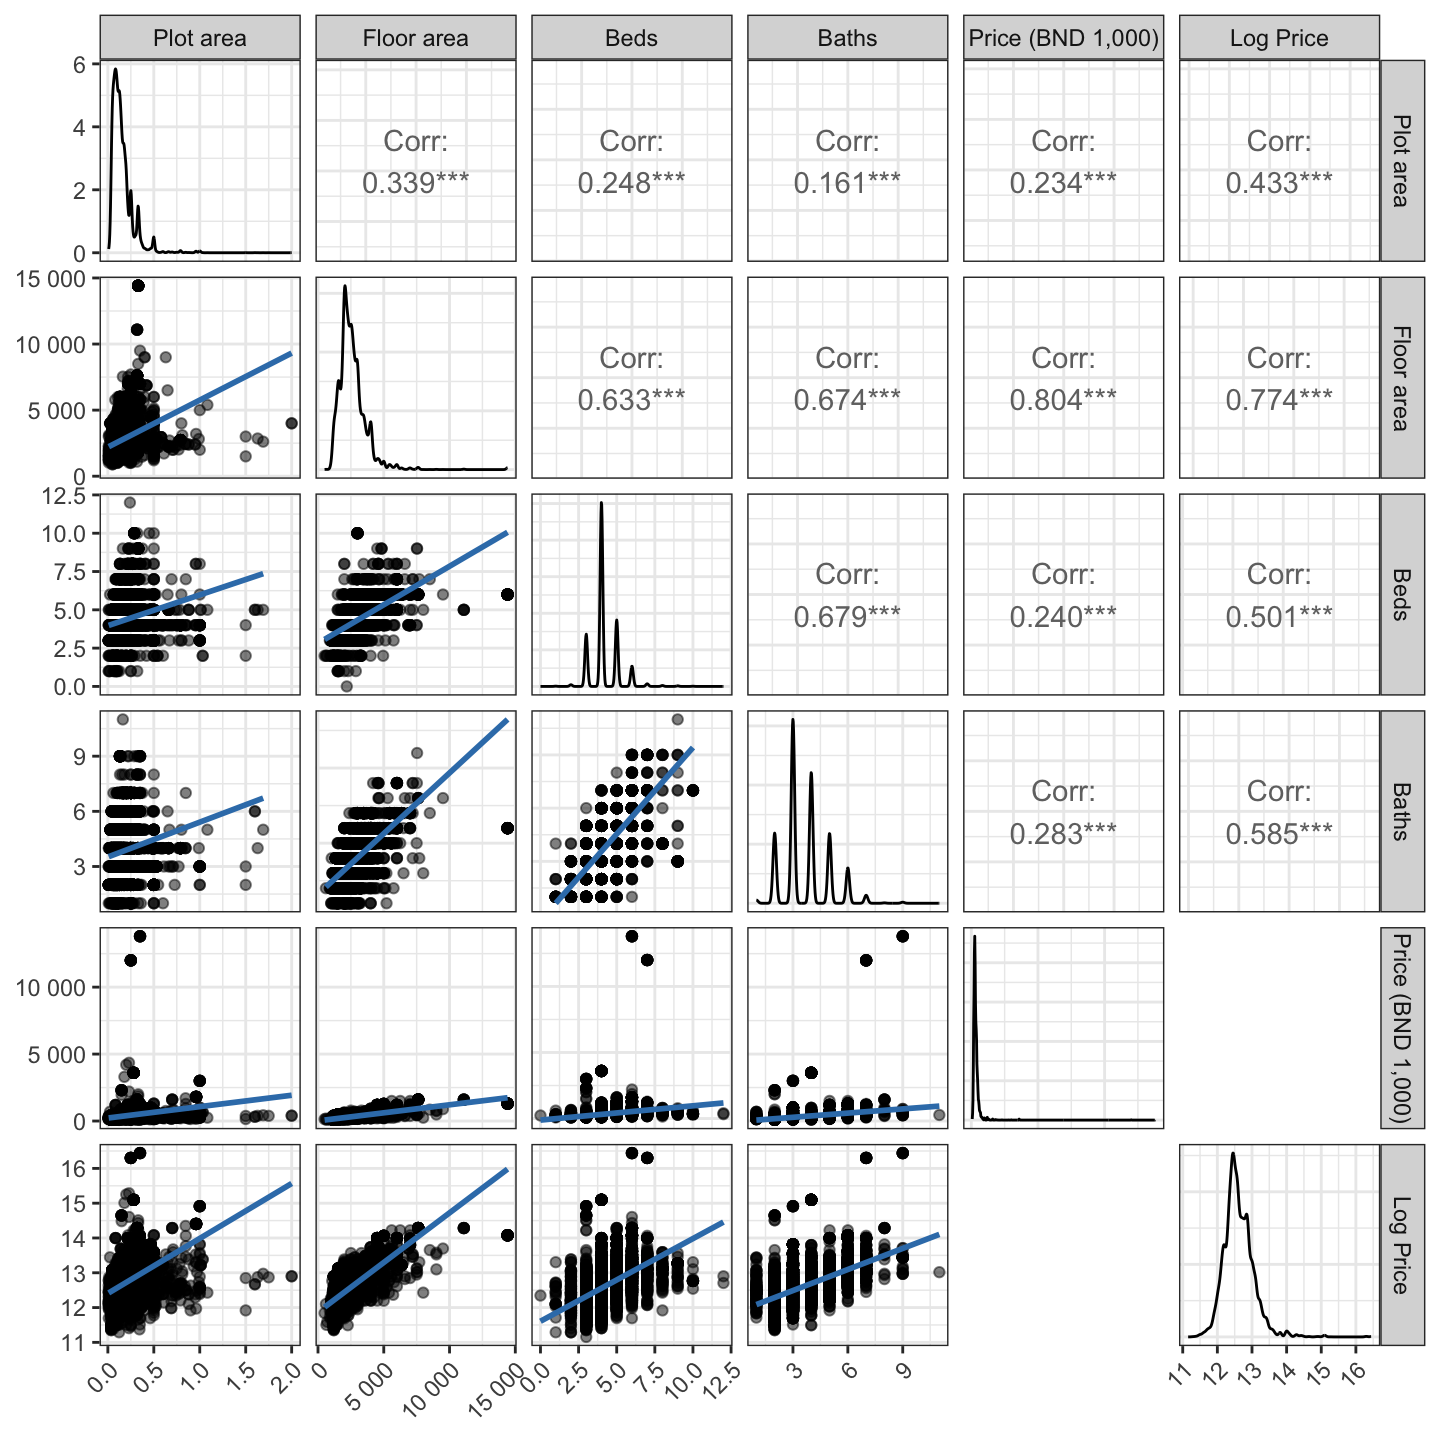
<figcaption>Figure 6: Pairwise correlation plot of continuous variables.</figcaption>
</figure>

## Comparison to RPPI Data

To demonstrate the quality of the data set, we compared it with the Residential Property Price Index (RPPI) \[[5](#ref-bdcb2021technical)\] published by the Brunei Darussalam Central Bank (BDCB). A simple median price per square foot (PPSF) index can be calculated by aggregating the data by quarters. This approach minimises the impact of missing values, as the index is based on aggregated data. <a href="#fig-rppi" class="quarto-xref">Figure 7</a> shows the comparison between the RPPI and the PPSF index calculated from our data set. The mean absolute error (MAE) between the two indices is calculated to be 4.71%, indicating a good level of agreement between the two data sets.

``` python
hsp_rppi |>  
  pivot_longer(c(index, rppi), names_to = "series", values_to = "value") |>
  ggplot(aes(x = quarter, y = value, col = series)) +
  geom_hline(yintercept = 1, linetype = "dashed") +
  geom_line(linewidth = 0.8) +
  scale_colour_brewer(palette = "Set1") +
  scale_y_continuous(labels = scales::percent, name = "Index") +
  zoo::scale_x_yearqtr(
    format = "%Y-Q%q", 
    expand = c(0, 0.1),
    name = NULL, 
    breaks = seq(2015, 2024.75, by = 0.25)
  ) +
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "none"
  ) +
  geom_text(
    data = tibble(
      quarter = c(2024.3 + 0.25, 2024.3 + 0.25),
      series = c("index", "rppi"),
      value = c(0.941, 0.955) - 0.02,
      label = c("Median PPSF", "RPPI (BDCB)")
    ),
    aes(label = label),
    hjust = 0
  ) +
  coord_cartesian(xlim = c(2015, 2025.75))
```

<figure id="fig-rppi">
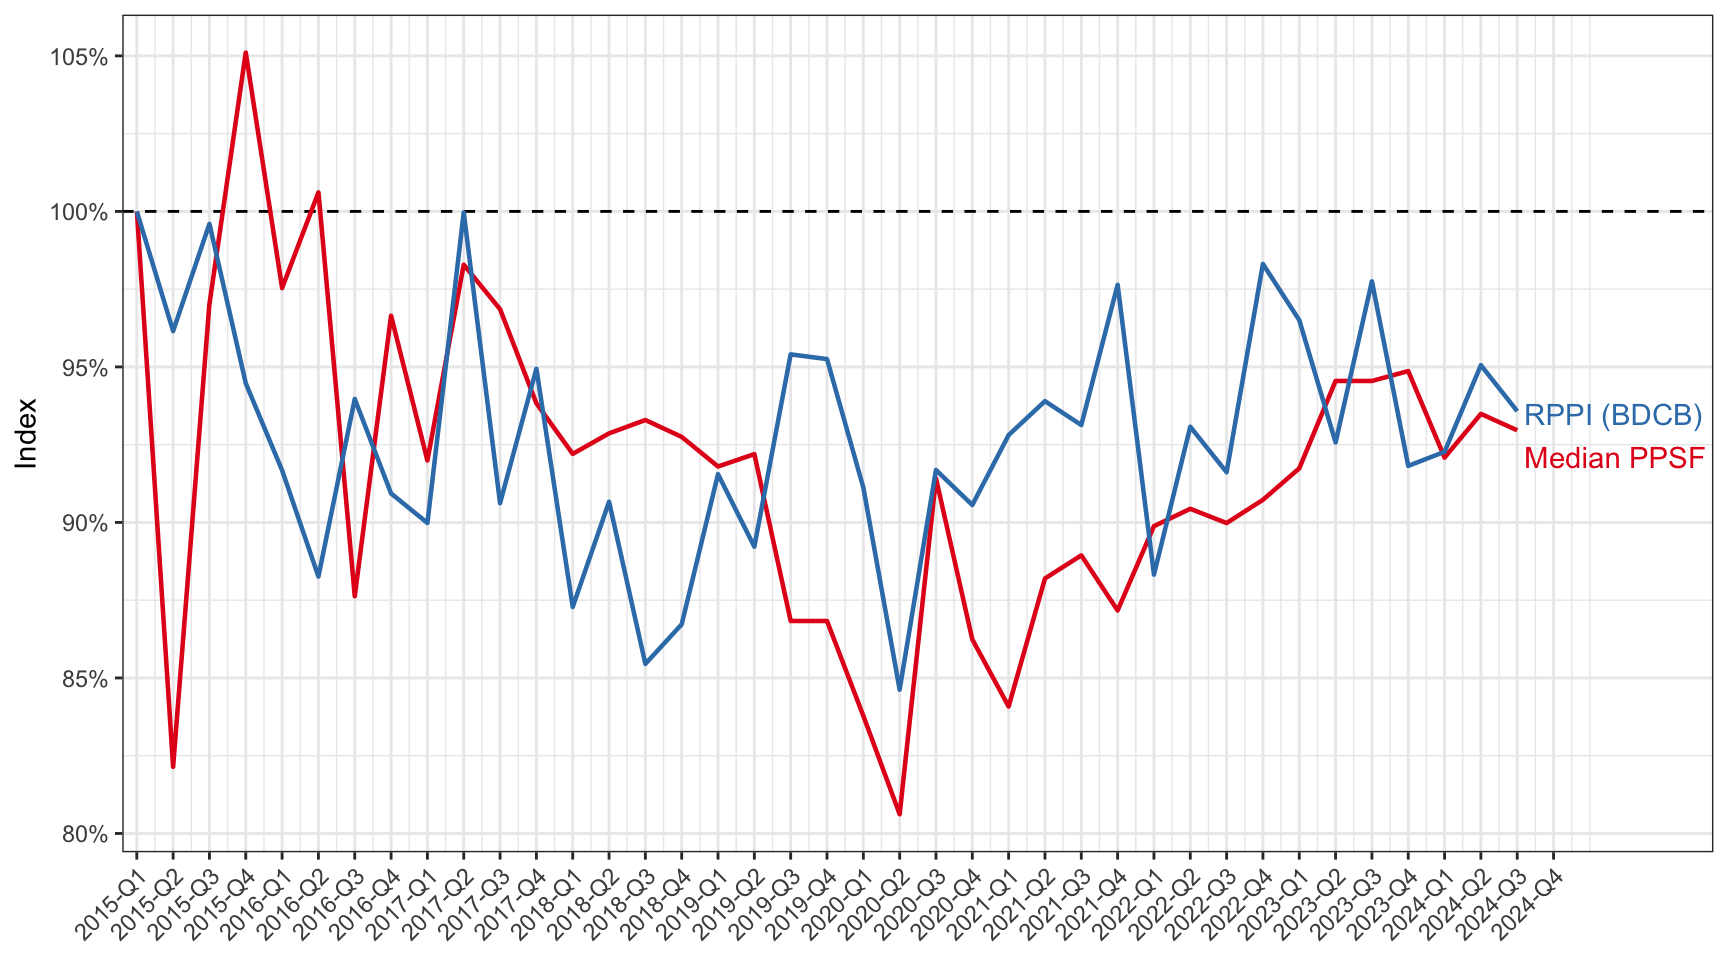
<figcaption>Figure 7: Comparison of quarterly median price per square foot indices (Median PPSF) and the official Residential Property Price Index (RPPI) from Brunei Darussalam Central Bank (BDCB).</figcaption>
</figure>

## LLM Accuracy Test

To test the accuracy of the LLM data extraction, we created a test data set of 100 house advertisements in the style of the web scraped data. Several popular models from Ollama were used, namely the Llama3.2 (3B), Mistral (7B), Phi 4 (14B), and DeepSeek-R1 distilled reasoning models based on Llama (8B) and Qwen (14B). For the locally run Ollama models, the settings were set to the default values, with the exception of a lowered temperature setting: `temperature = 0.1`, `top-p=0.9` (nucleus sampling), `top-k=40` (top-k sampling), `max-tokens=128`, and `repeat-penalty=1.1`. Additionally, two models from OpenAI were included for comparison. These were the GPT-4o and the o1-mini, with the latter being a reasoning model.

<a href="#fig-llmtest" class="quarto-xref">Figure 8</a> and <a href="#tbl-llmtest-time" class="quarto-xref">Table 4</a> show the accuracy results for each model. OpenAI’s models topped the accuracy charts, with the o1-mini and gpt-4o models achieving the accuracy scores of 99.2% and 98.9% respectively. The reasoning model deepseek-r1:14b was the best performing locally run model, scoring 96.9% accuracy. Evidently, the smaller the model, the less accurate the extraction process (cf. llama3.2 70.8%). Most inaccuracies occurred in the `status` variable, where models struggled to parse the correct build status from vague advertisement descriptions. However, key variables such as `price`, `type`, `plot_area`, `floor_area`, `beds`, and `baths` are generally reliable (\>90% accuracy).

``` python
load(here::here("experiments/llm_test.RData"))
p_llm_test
```

<figure id="fig-llmtest">
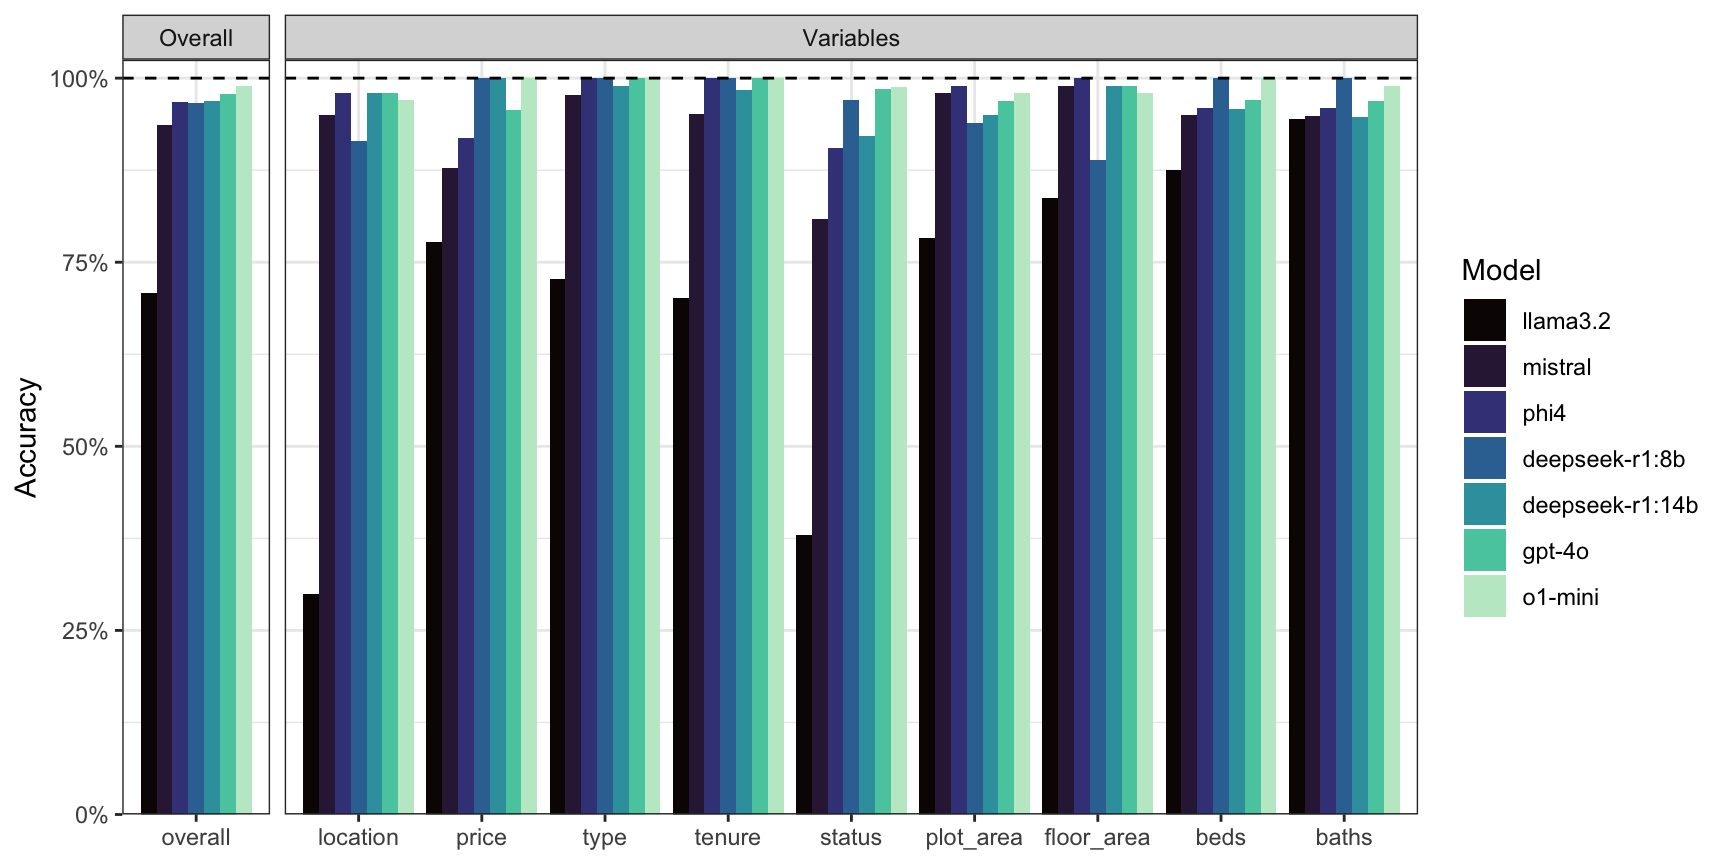
<figcaption>Figure 8: Comparison of data extraction accuracy across multiple LLM models on the test dataset. Each bar represents the percentage of correctly extracted fields for a given model.</figcaption>
</figure>

The run time statistics for each model is shown in the table below. The computer used was a Mac Pro 3.2GHz 16 core Intel Xeon W with 48GB of DDR4 RAM. At the time of running the tests, graphics card support was not available for the LLM models, which would have significantly reduced the run time. Certainly cloud-based models such as OpenAI’s models are much faster than running models locally, though a paid API key is required.

In [ ]:
llmtest_time <-
  tibble(
    model = c("llama3.2", "mistral", "phi4", "deepseek-r1:8b", "deepseek-r1:14b", "gpt-4o", "o1-mini"),
    min = c(1.077457, 2.661627, 3.722881, 36.829881, 40.8939, 1.279267, 5.968378),
    mean = c(6.396146, 10.437078, 14.108101, 65.973720, 117.666112, 2.457973, 7.945925),
    median = c(9.595035, 2.907932, 4.267815, 54.605889, 81.71249, 1.733497, 7.506522),
    max = c(10.16348, 22.21225, 38.01499, 112.77667, 151.2027, 5.379483, 9.943231)
  )

gt(llmtest_time) |>
  fmt_number(decimals = 2) |>
  cols_label(
    model = "Model",
    min = "Minimum",
    mean = "Mean",
    median = "Median",
    max = "Maximum"
  ) |>
  tab_spanner(
    label = "Time (seconds)",
    columns = min:max
  )